In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

In [2]:
def read_label(): #read house 1 and 2 labels
    label = {}
    for i in range(1, 3):
        hi = 'low_freq/house_{}/labels.dat'.format(i)
        label[i] = {}
        with open(hi) as f:
            for line in f:
                splitted_line = line.split(' ')
                label[i][int(splitted_line[0])] = splitted_line[1].strip() + '_' + splitted_line[0]
    return label
labels = read_label()
for i in range(1,3):
    print('House {}: '.format(i), labels[i], '\n')

House 1:  {1: 'mains_1', 2: 'mains_2', 3: 'oven_3', 4: 'oven_4', 5: 'refrigerator_5', 6: 'dishwaser_6', 7: 'kitchen_outlets_7', 8: 'kitchen_outlets_8', 9: 'lighting_9', 10: 'washer_dryer_10', 11: 'microwave_11', 12: 'bathroom_gfi_12', 13: 'electric_heat_13', 14: 'stove_14', 15: 'kitchen_outlets_15', 16: 'kitchen_outlets_16', 17: 'lighting_17', 18: 'lighting_18', 19: 'washer_dryer_19', 20: 'washer_dryer_20'} 

House 2:  {1: 'mains_1', 2: 'mains_2', 3: 'kitchen_outlets_3', 4: 'lighting_4', 5: 'stove_5', 6: 'microwave_6', 7: 'washer_dryer_7', 8: 'kitchen_outlets_8', 9: 'refrigerator_9', 10: 'dishwaser_10', 11: 'disposal_11'} 



In [3]:
def read_merge_data(house): #load watt data in pandas data frame in format of labels as columns and timestamps as rows    

    path = 'low_freq/house_{}/'.format(house)

    file = path + 'channel_1.dat'
    df = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][1]], 
                                       dtype = {'unix_time': 'int64', labels[house][1]:'float64'}) 
    
    num_apps = len(glob.glob(path + 'channel*'))
    for i in range(2, num_apps + 1):
        file = path + 'channel_{}.dat'.format(i)
        data = pd.read_table(file, sep = ' ', names = ['unix_time', labels[house][i]], 
                                       dtype = {'unix_time': 'int64', labels[house][i]:'float64'})
        df = pd.merge(df, data, how = 'inner', on = 'unix_time')
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    df = df.set_index(df['timestamp'].values)
    df.drop(['unix_time','timestamp'], axis=1, inplace=True)
    return df
df = {}
for i in range(1,3):
    df[i] = read_merge_data(i)

In [4]:
for i in range(1,3):
    print('House {} data has shape: '.format(i), df[i].shape)
    display(df[i].tail(3))

House 1 data has shape:  (406748, 20)


,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
2011-05-24 19:56:27,235.46,38.61,0.0,0.0,190.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:30,235.98,38.77,0.0,0.0,189.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:34,235.29,38.83,0.0,0.0,186.0,0.0,26.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


House 2 data has shape:  (316840, 11)


,mains_1,mains_2,kitchen_outlets_3,lighting_4,stove_5,microwave_6,washer_dryer_7,kitchen_outlets_8,refrigerator_9,dishwaser_10,disposal_11
2011-05-22 23:59:01,10.84,252.61,0.0,9.0,0.0,5.0,0.0,2.0,158.0,0.0,0.0
2011-05-22 23:59:04,10.88,253.02,0.0,9.0,0.0,4.0,0.0,2.0,160.0,0.0,0.0
2011-05-22 23:59:08,10.84,252.77,0.0,9.0,0.0,4.0,0.0,2.0,157.0,0.0,0.0


In [5]:
#show the days of house 1 and house 2
dates = {}
for i in range(1,3):
    dates[i] = [str(time)[:10] for time in df[i].index.values]
    dates[i] = sorted(list(set(dates[i])))
    print('House {0} data contain {1} days from {2} to {3}.'.format(i,len(dates[i]),dates[i][0], dates[i][-1]))
    print(dates[i], '\n')

House 1 data contain 23 days from 2011-04-18 to 2011-05-24.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-03', '2011-05-06', '2011-05-07', '2011-05-11', '2011-05-12', '2011-05-13', '2011-05-22', '2011-05-23', '2011-05-24'] 

House 2 data contain 16 days from 2011-04-18 to 2011-05-22.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-29', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-22'] 



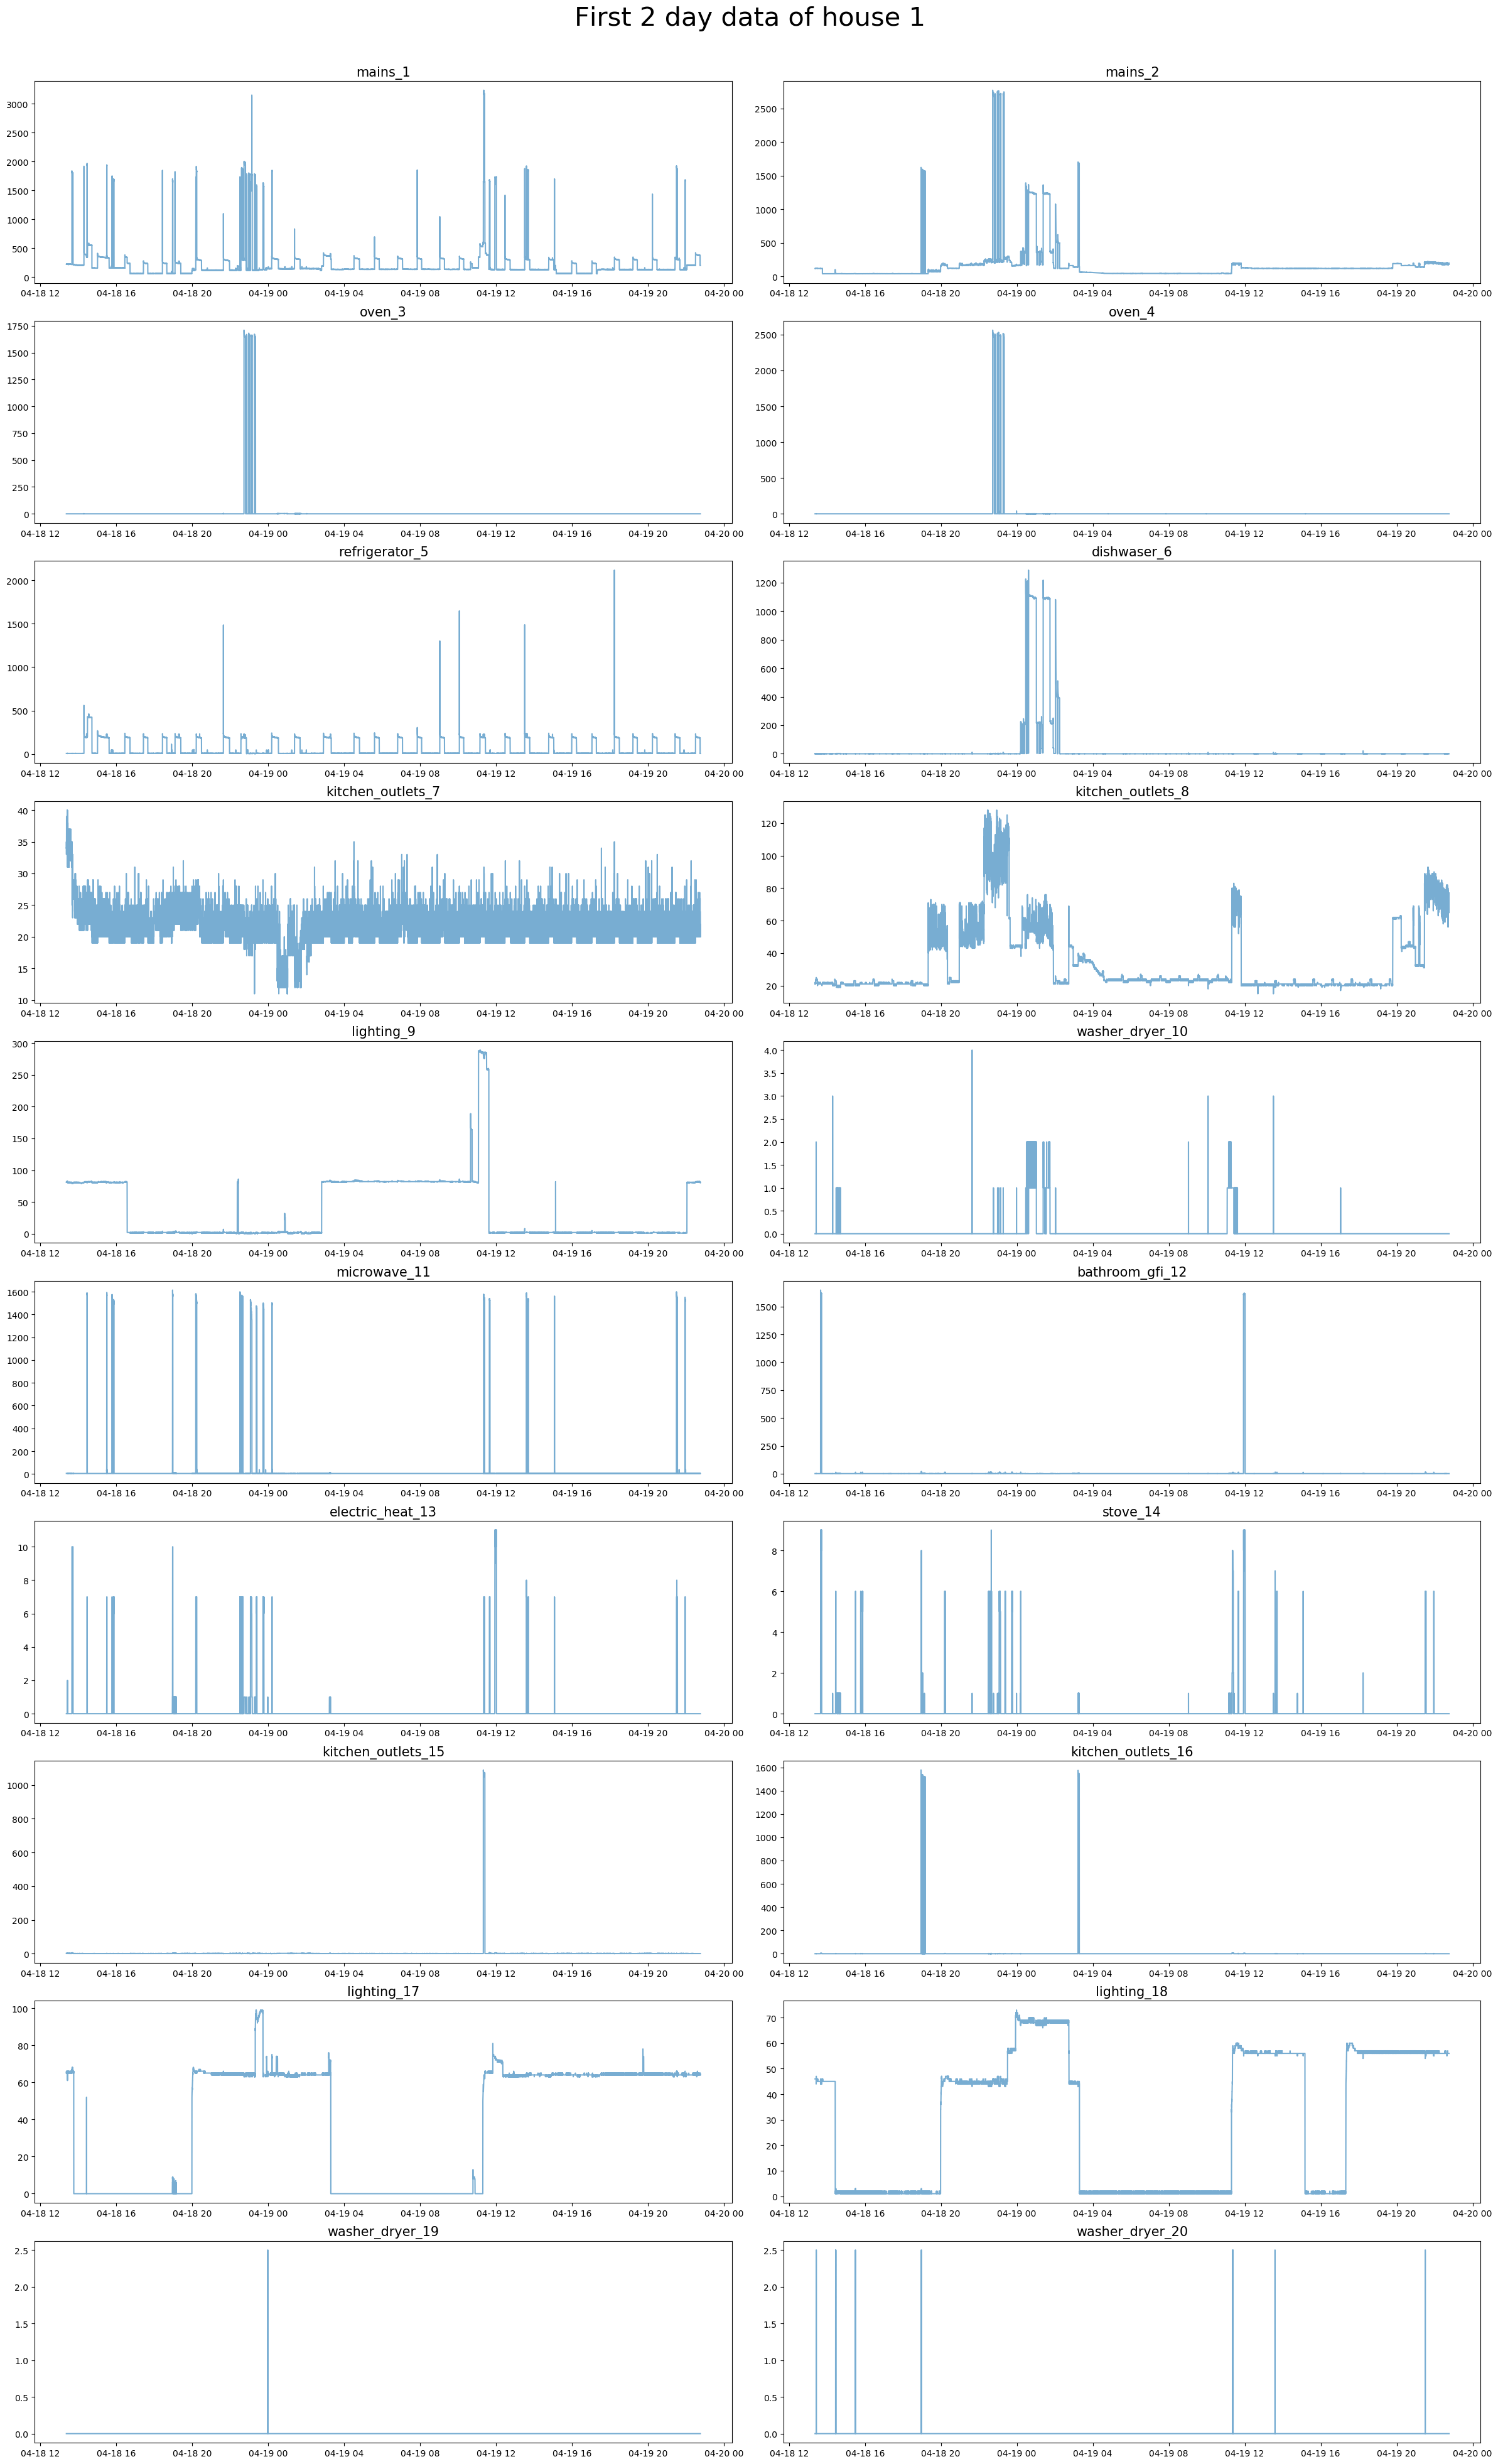

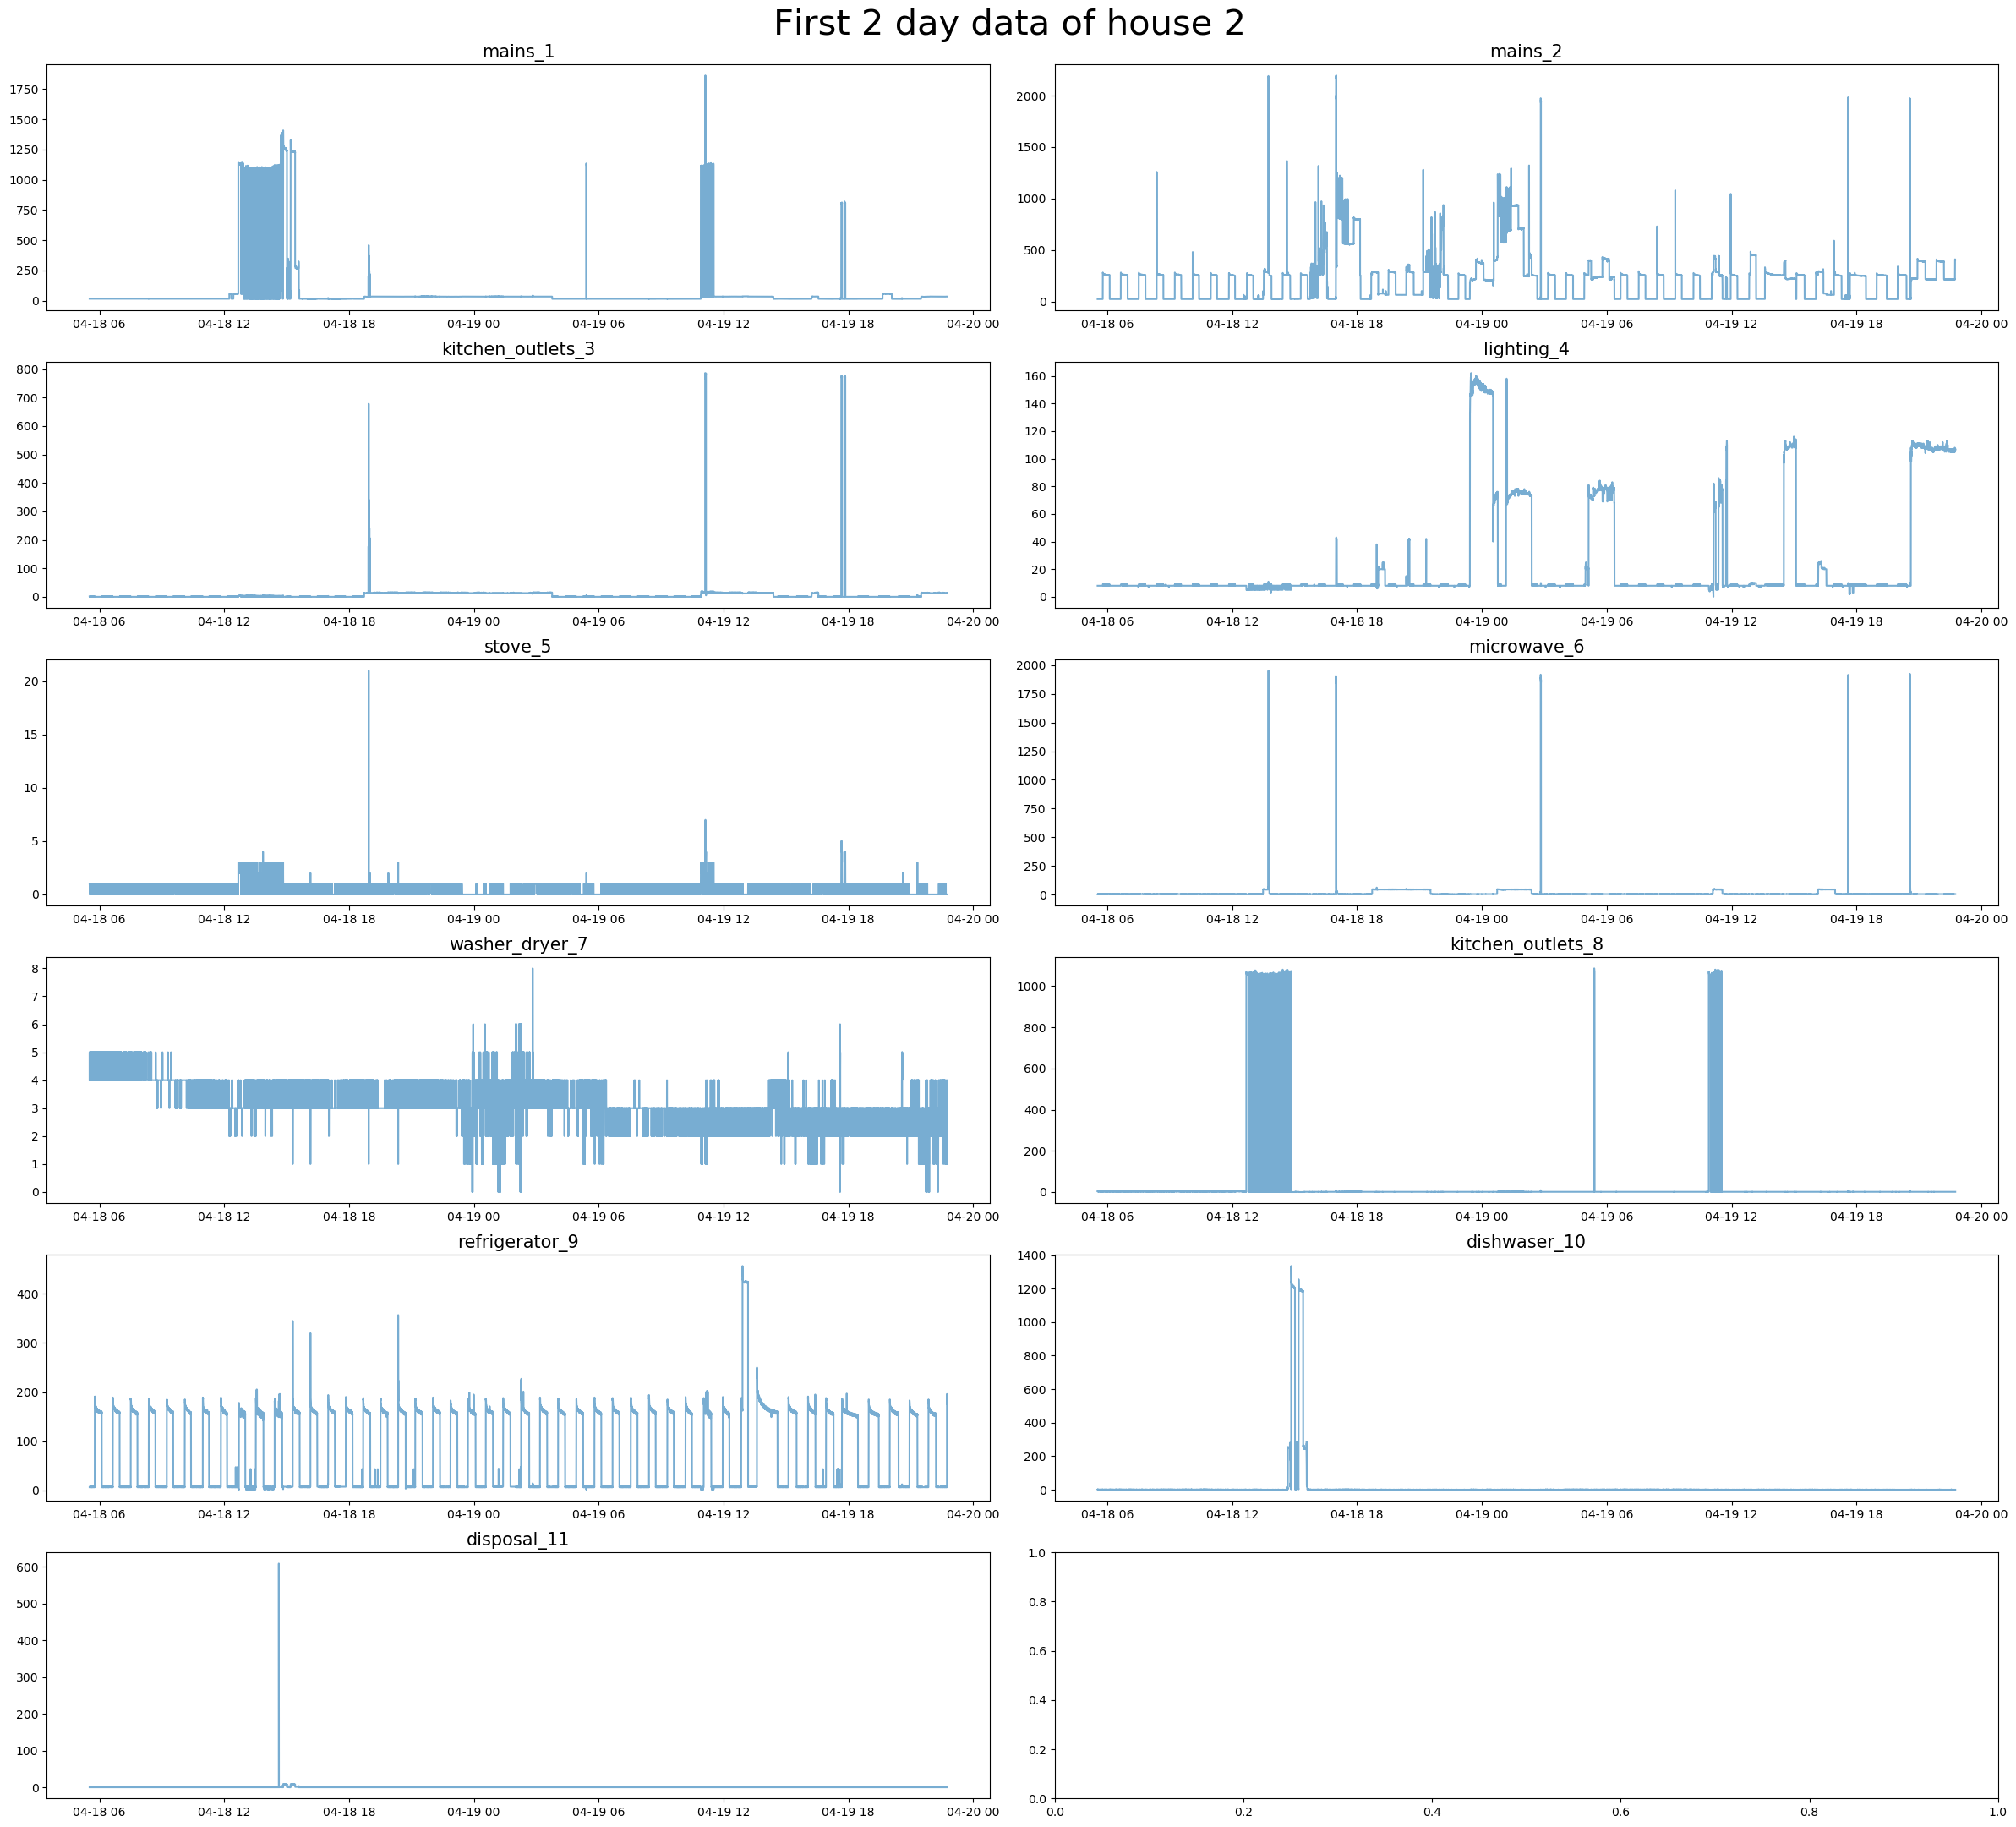

In [6]:
# Plot 2 first day data of house 1 and 2
def plot_df(df, title):
    apps = df.columns.values
    num_apps = len(apps) 
    fig, axes = plt.subplots((num_apps+1)//2,2, figsize=(24, num_apps*2) )
    for i, key in enumerate(apps):
        axes.flat[i].plot(df[key], alpha = 0.6)
        axes.flat[i].set_title(key, fontsize = '15')
    plt.suptitle(title, fontsize = '30')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

for i in range(1,3):
    plot_df(df[i][:dates[i][1]], 'First 2 day data of house {}'.format(i))

Text(0.5, 1.0, 'House 2')

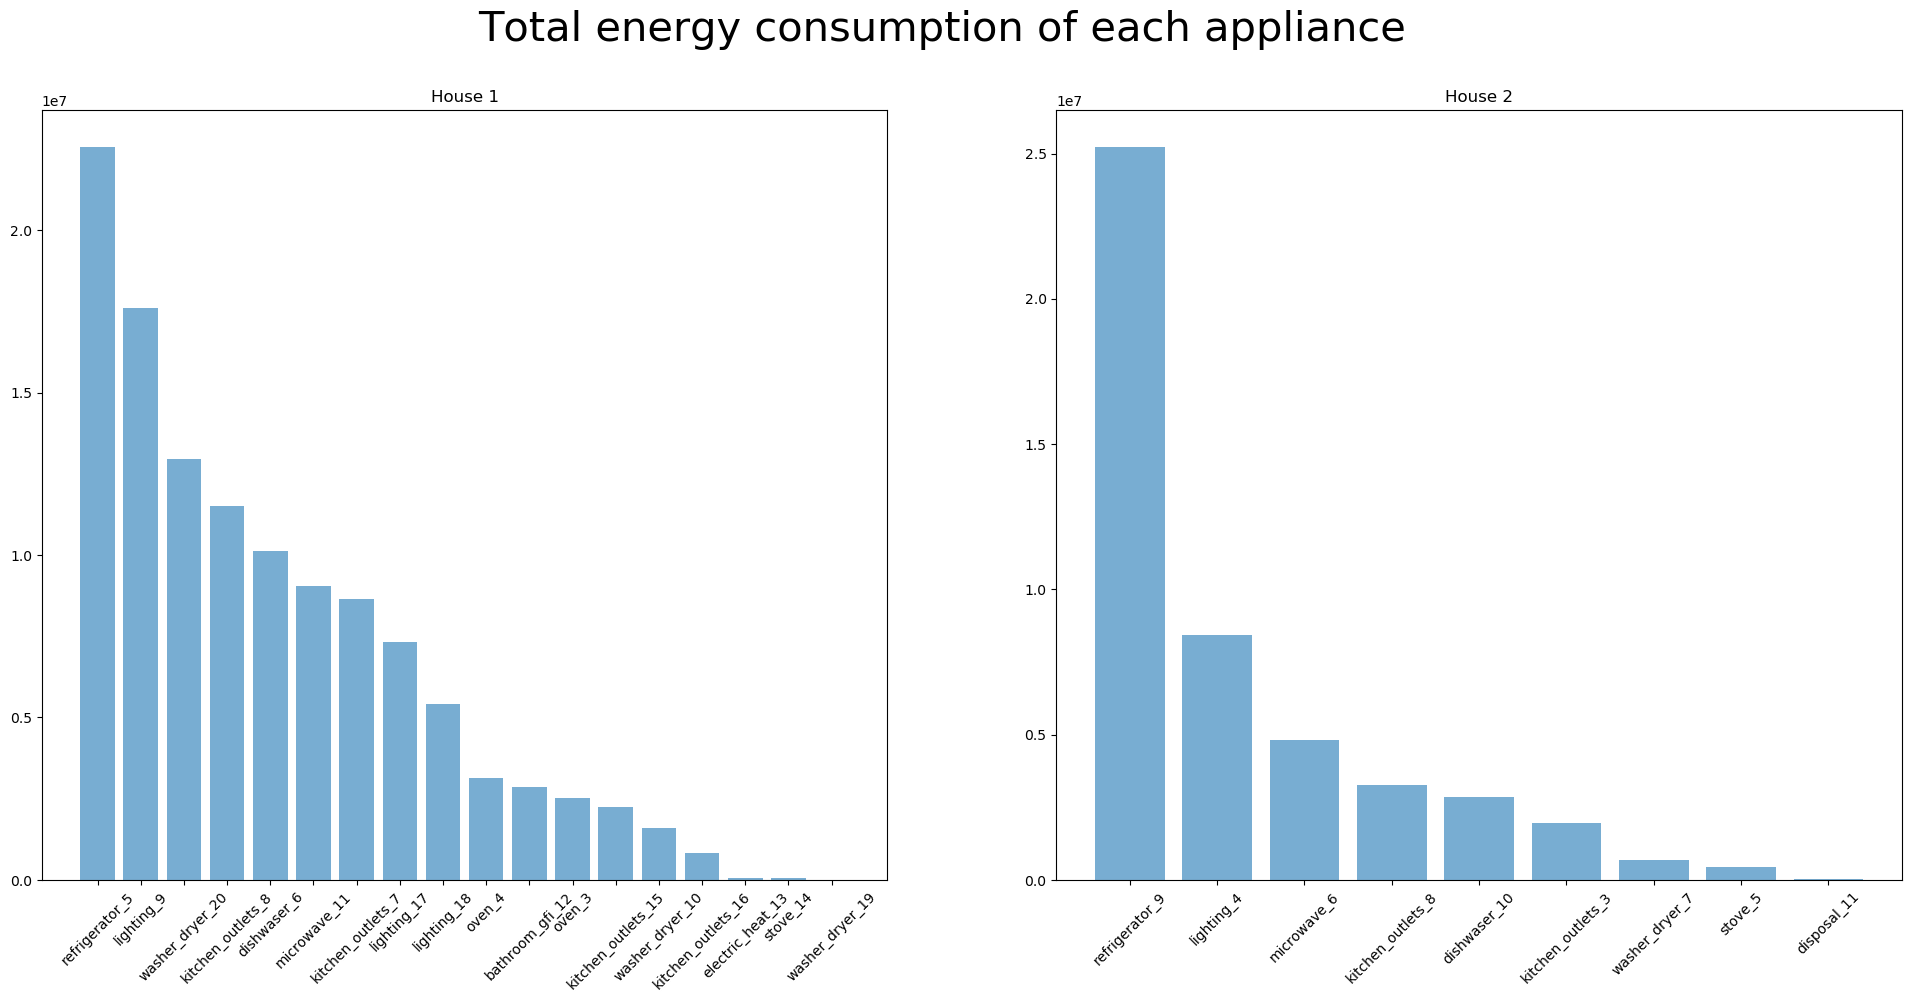

In [7]:
# Plot total energy consumption of each appliance from two houses
fig, axes = plt.subplots(1,2,figsize=(24, 10))
plt.suptitle('Total energy consumption of each appliance', fontsize = 30)
cons1 = df[1][df[1].columns.values[2:]].sum().sort_values(ascending=False)
app1 = cons1.index
y_pos1 = np.arange(len(app1))
axes[0].bar(y_pos1, cons1.values,  alpha=0.6) 
plt.sca(axes[0])
plt.xticks(y_pos1, app1, rotation = 45)
plt.title('House 1')

cons2 = df[2][df[2].columns.values[2:]].sum().sort_values(ascending=False)
app2 = cons2.index
y_pos2 = np.arange(len(app2))
axes[1].bar(y_pos2, cons2.values, alpha=0.6)
plt.sca(axes[1])
plt.xticks(y_pos2, app2, rotation = 45)
plt.title('House 2')

In [8]:
# Separate house 1 data into train, validation and test data
df1_train = df[1][:dates[1][10]]
df1_val = df[1][dates[1][11]:dates[1][16]]
df1_test = df[1][dates[1][17]:]
print('df_train.shape: ', df1_train.shape)
print('df_val.shape: ', df1_val.shape)
print('df_test.shape: ', df1_test.shape)

df_train.shape:  (214816, 20)
df_val.shape:  (104875, 20)
df_test.shape:  (87057, 20)


**data for oven_3**

In [9]:
# Using mains_1, mains_2 to predict oven_3
X_train1 = df1_train[['mains_1','mains_2']].values 
y_train1 = df1_train['oven_3'].values
X_val1 = df1_val[['mains_1','mains_2']].values
y_val1 = df1_val['oven_3'].values
X_test1 = df1_test[['mains_1','mains_2']].values
y_test1 = df1_test['oven_3'].values
print(X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape)

(214816, 2) (214816,) (104875, 2) (104875,) (87057, 2) (87057,)


**data for refrigerator_5**

In [10]:
# Using mains_1, mains_2 to predict refrigerator_5
X_train2 = df1_train[['mains_1','mains_2']].values 
y_train2 = df1_train['refrigerator_5'].values
X_val2 = df1_val[['mains_1','mains_2']].values
y_val2 = df1_val['refrigerator_5'].values
X_test2 = df1_test[['mains_1','mains_2']].values
y_test2 = df1_test['refrigerator_5'].values
print(X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape)

(214816, 2) (214816,) (104875, 2) (104875,) (87057, 2) (87057,)


**data for kitchen_outlets_7**

In [11]:
# Using mains_1, mains_2 to predict kitchen_outlets_7
X_train3 = df1_train[['mains_1','mains_2']].values 
y_train3 = df1_train['kitchen_outlets_7'].values
X_val3 = df1_val[['mains_1','mains_2']].values
y_val3 = df1_val['kitchen_outlets_7'].values
X_test3 = df1_test[['mains_1','mains_2']].values
y_test3 = df1_test['kitchen_outlets_7'].values
print(X_train3.shape, y_train3.shape, X_val3.shape, y_val3.shape, X_test3.shape, y_test3.shape)

(214816, 2) (214816,) (104875, 2) (104875,) (87057, 2) (87057,)


**data for dishwaser_6**

In [12]:
# Using mains_1, mains_2 to predict kitchen_outlets_7
X_train4 = df1_train[['mains_1','mains_2']].values 
y_train4 = df1_train['dishwaser_6'].values
X_val4 = df1_val[['mains_1','mains_2']].values
y_val4 = df1_val['dishwaser_6'].values
X_test4 = df1_test[['mains_1','mains_2']].values
y_test4 = df1_test['dishwaser_6'].values
print(X_train4.shape, y_train4.shape, X_val4.shape, y_val4.shape, X_test4.shape, y_test4.shape)

(214816, 2) (214816,) (104875, 2) (104875,) (87057, 2) (87057,)


In [13]:
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [14]:
from keras.layers import Dense, Conv1D, LSTM, Bidirectional, Dropout


***METRICS : recall, precision, f1***

In [15]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [16]:
def mse_loss(y_predict, y):
    return np.mean(np.square(y_predict - y)) 
def mae_loss(y_predict, y):
    return np.mean(np.abs(y_predict - y)) 

In [17]:
#rnndisagreggator
def build_fc_model():
    fc_model = Sequential()
    fc_model.add(Conv1D(16, 4, activation="linear", input_shape=(2,1), padding="same", strides=1))
    fc_model.add(Bidirectional(LSTM(128, return_sequences=True, stateful=False), merge_mode='concat'))
    fc_model.add(Bidirectional(LSTM(256, return_sequences=False, stateful=False), merge_mode='concat'))

     # Fully Connected Layers
    fc_model.add(Dense(128, activation='tanh'))
    fc_model.add(Dense(1, activation='linear'))
    fc_model.add( Dropout(0.2) )

    fc_model.summary()

    return fc_model


***OVEN 3 TRAINING***

In [18]:
fc_model_1 = build_fc_model()

adam = Adam(lr = 1e-5)
fc_model_1.compile(loss='mean_squared_error', optimizer=adam,metrics=['accuracy',f1_m,precision_m, recall_m])
start = time.time()
checkpointer = ModelCheckpoint(filepath="./fc_oven_3_h1_2.hdf5", verbose=0, save_best_only=True)
hist_fc_1 = fc_model_1.fit( X_train1, y_train1, batch_size=512, verbose=1, epochs=200,validation_split=0.33, callbacks=[checkpointer])
loss, accuracy, f1_score, precision, recall = fc_model_1.evaluate(X_test1, y_test1, verbose=0)


print('Finish trainning. Time: ', time.time() - start)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 16)             80        
                                                                 
 bidirectional (Bidirectiona  (None, 2, 256)           148480    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
 dropout (Dropout)           (None, 1)                 0

Epoch 1/200
282/282 [==============================] - 73s 197ms/step - loss: 8615.6045 - accuracy: 0.6789 - f1_m: 0.1641 - precision_m: 70921.9844 - recall_m: 0.6570 - val_loss: 0.9566 - val_accuracy: 0.9496 - val_f1_m: 0.0228 - val_precision_m: 0.0185 - val_recall_m: 0.0429
Epoch 2/200
282/282 [==============================] - 52s 184ms/step - loss: 8374.3721 - accuracy: 0.8081 - f1_m: 0.2511 - precision_m: 0.1988 - recall_m: 0.6103 - val_loss: 2.1581 - val_accuracy: 0.9754 - val_f1_m: 0.0634 - val_precision_m: 143885.2344 - val_recall_m: 0.0452
Epoch 3/200
282/282 [==============================] - 50s 176ms/step - loss: 8362.8896 - accuracy: 0.6849 - f1_m: 0.2478 - precision_m: 35461.1875 - recall_m: 0.6138 - val_loss: 53.4093 - val_accuracy: 0.0000e+00 - val_f1_m: 0.0181 - val_precision_m: 0.0133 - val_recall_m: 0.1079
Epoch 4/200
282/282 [==============================] - 47s 167ms/step - loss: 8211.1709 - accuracy: 0.6538 - f1_m: 0.1934 - precision_m: 0.1406 - recall_m: 0.7349 

In [19]:
print(loss, accuracy, f1_score, precision, recall)

20551.435546875 0.8772068619728088 0.03544826805591583 0.034114014357328415 0.039667438715696335


In [20]:
fc_model_1 = load_model('fc_oven_3_h1_2.hdf5', custom_objects = {"f1_m": f1_m, "precision_m": precision_m, "recall_m": recall_m})
pred_fc_1 = fc_model_1.predict(X_test1).reshape(-1)
mse_loss_fc_1= mse_loss(pred_fc_1, y_test1)
mae_loss_fc_1 = mae_loss(pred_fc_1, y_test1)
print('Mean square error on test set: ', mse_loss_fc_1)
print('Mean absolute error on the test set: ', mae_loss_fc_1)

2721/2721 [==============================] - 19s 6ms/step
Mean square error on test set:  25587.46516986908
Mean absolute error on the test set:  16.28667639711624


In [21]:
# Plot real and predict appliance's consumption on six days of test data
def plot_each_app(df, dates, predict, y_test, title, look_back = 0):
    num_date = len(dates)
    fig, axes = plt.subplots(num_date,1,figsize=(24, num_date*5) )
    plt.suptitle(title, fontsize = '25')
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for i in range(num_date):
        if i == 0: l = 0
        ind = df[dates[i]].index[look_back:]
        axes.flat[i].plot(ind, y_test[l:l+len(ind)], color = 'blue', alpha = 0.6, label = 'True value')
        axes.flat[i].plot(ind, predict[l:l+len(ind)], color = 'red', alpha = 0.6, label = 'Predicted value')
        axes.flat[i].legend()
        l = len(ind)



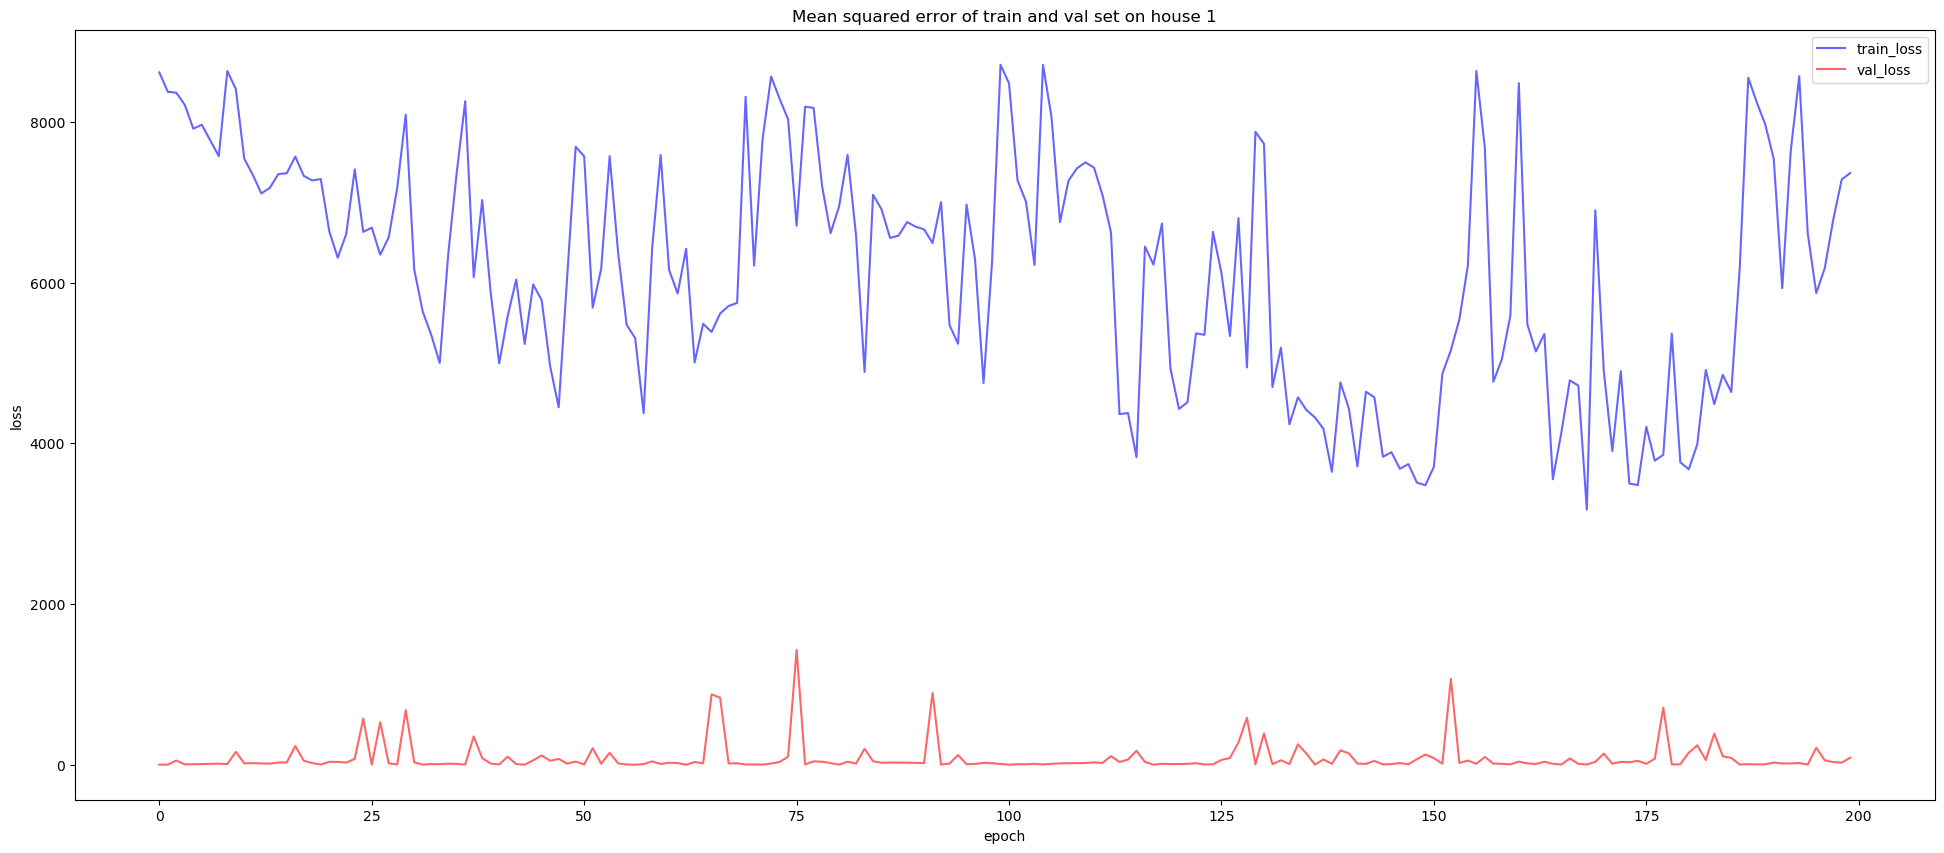

In [22]:
train_loss = hist_fc_1.history['loss']
val_loss = hist_fc_1.history['val_loss']
def plot_losses(train_loss, val_loss):
    plt.rcParams["figure.figsize"] = [24,10]
    plt.title('Mean squared error of train and val set on house 1')
    plt.plot( range(len(train_loss)), train_loss, color = 'b', alpha = 0.6, label='train_loss' )
    plt.plot( range(len( val_loss )), val_loss, color = 'r', alpha = 0.6, label='val_loss' )
    plt.xlabel( 'epoch' )
    plt.ylabel( 'loss' )
    plt.legend()

plot_losses(train_loss, val_loss)

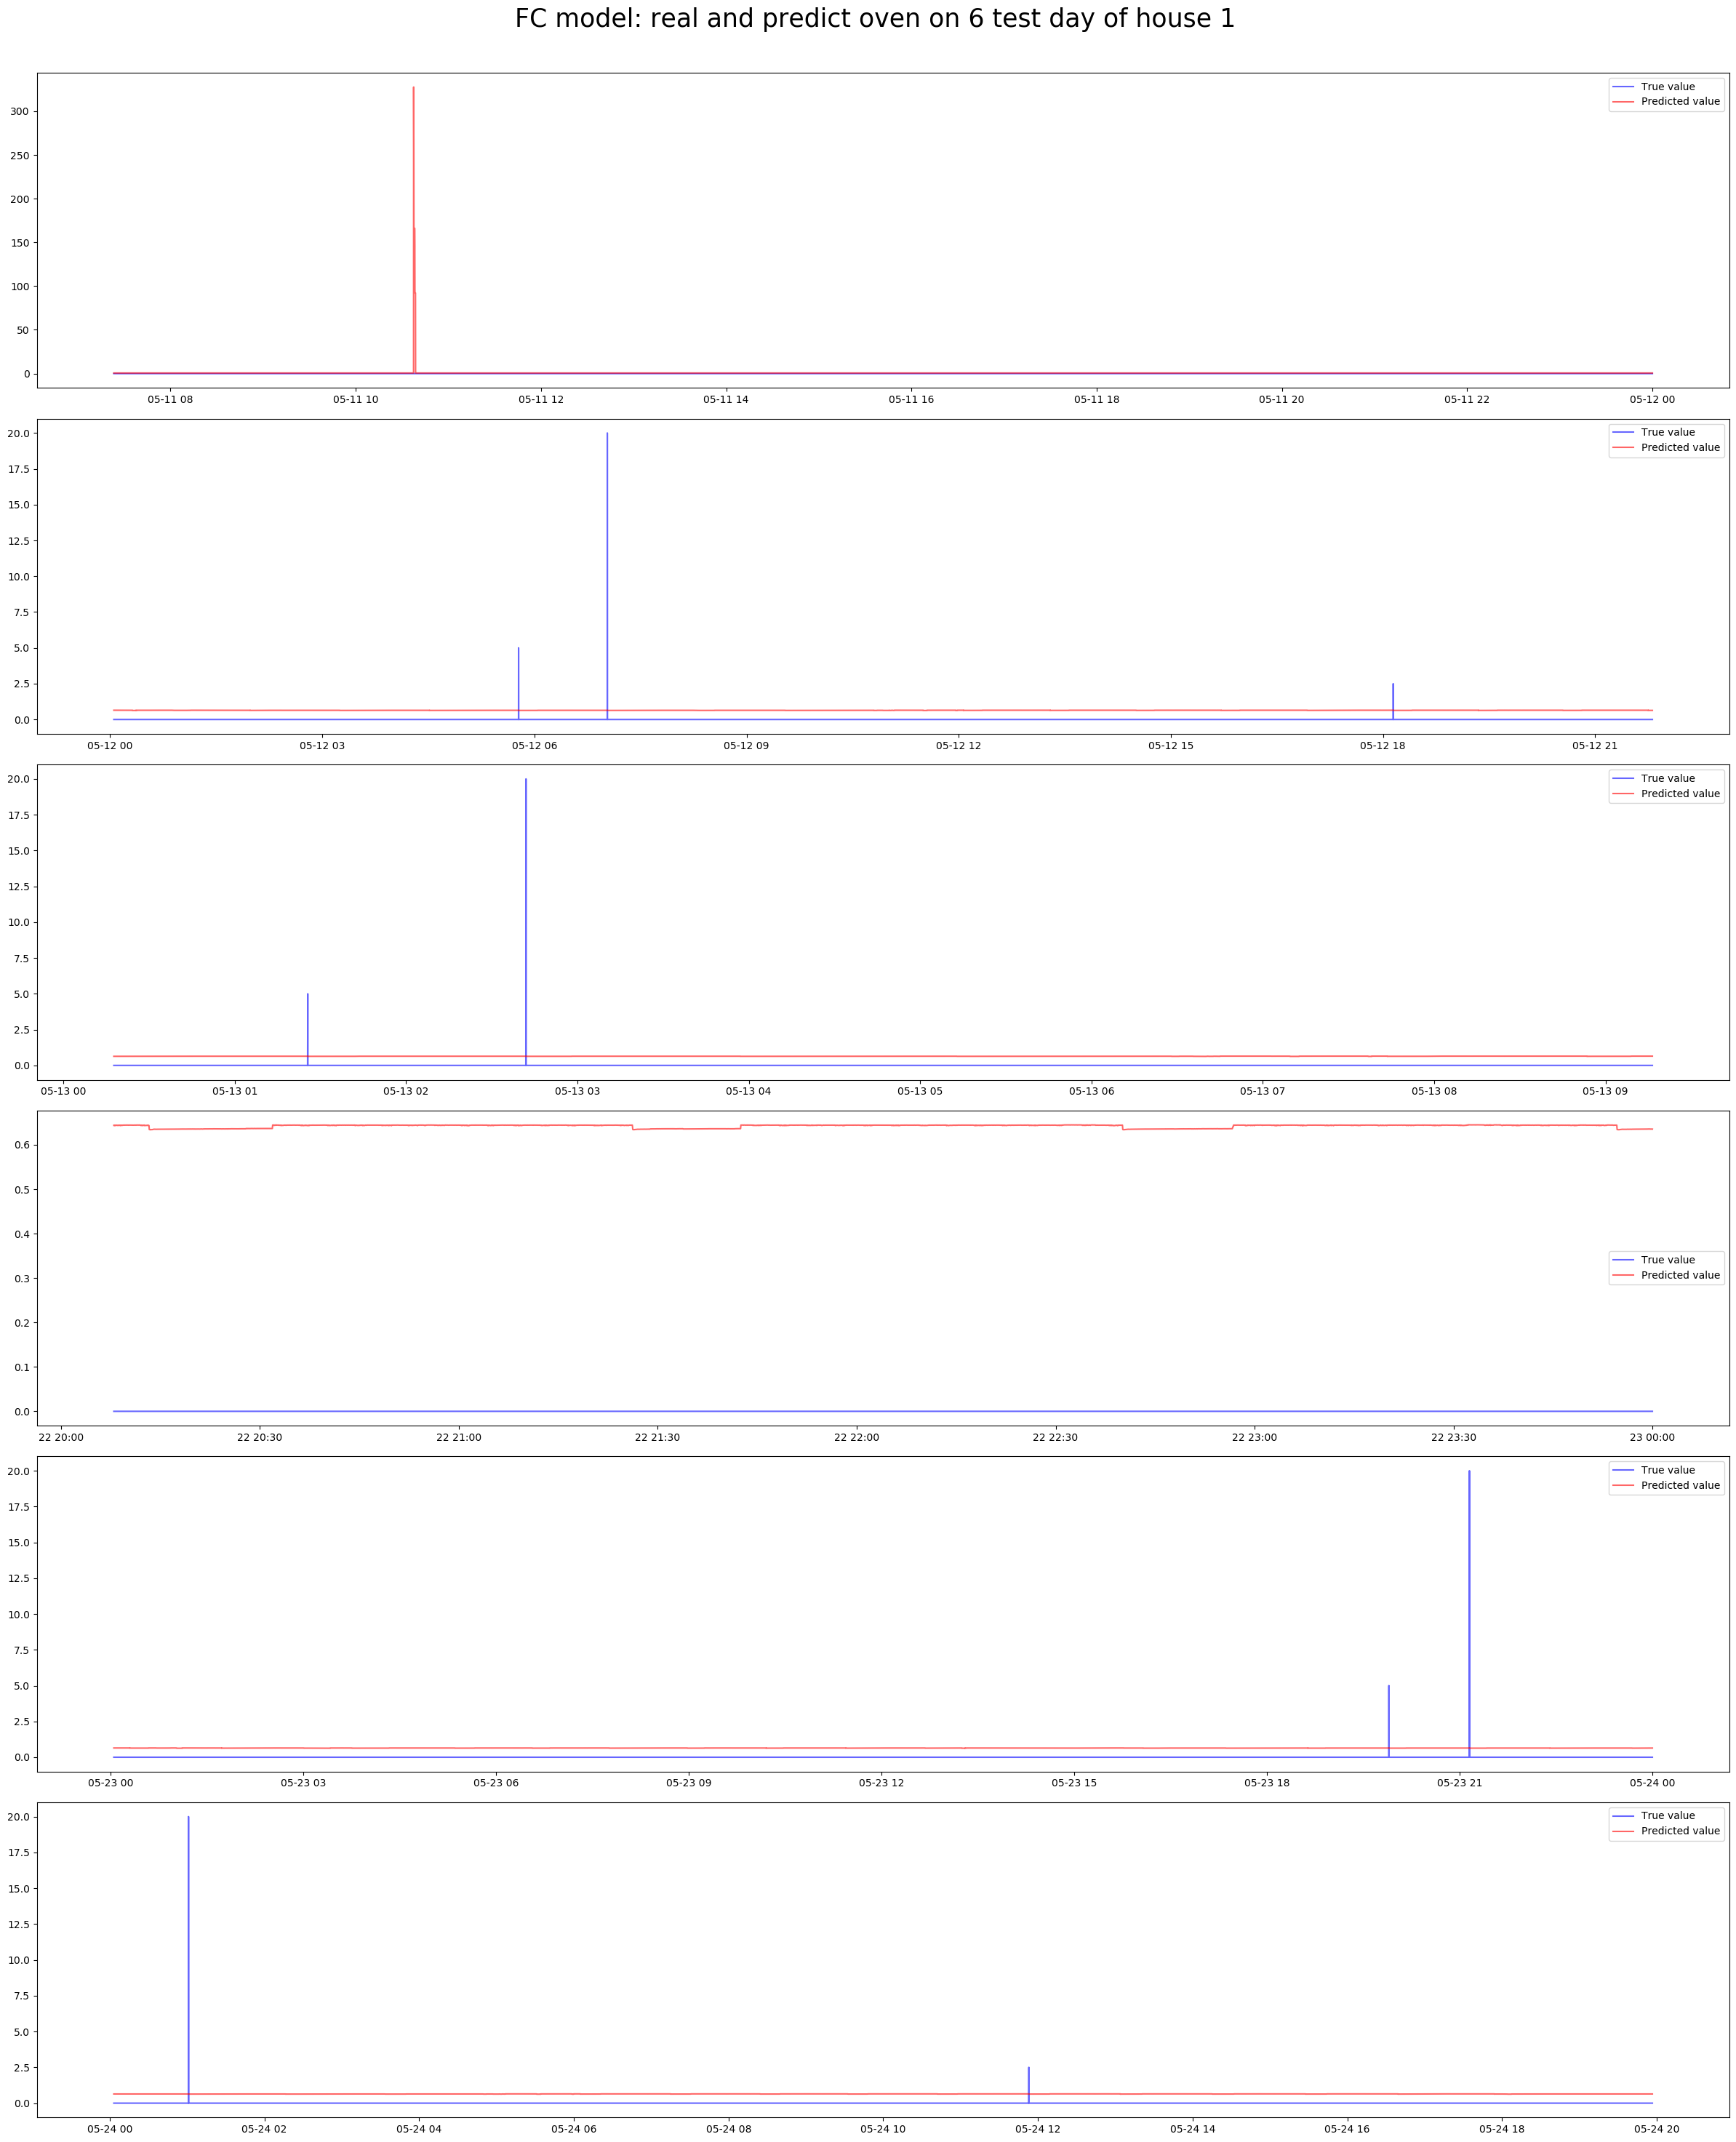

In [23]:
plot_each_app(df1_test, dates[1][17:], pred_fc_1, y_test1, 
              'FC model: real and predict oven on 6 test day of house 1', look_back = 50)

***REFRIGERATOR 5 TRAINING***

In [24]:
fc_model_2 = build_fc_model()

adam = Adam(lr = 1e-5)
fc_model_2.compile(loss='mean_squared_error', optimizer=adam)
start = time.time()
checkpointer = ModelCheckpoint(filepath="./fc_refrigerator_5_h1_2.hdf5", verbose=0, save_best_only=True)
hist_fc_2 = fc_model_2.fit( X_train2, y_train2, batch_size=512, verbose=1, epochs=200,validation_split=0.33, callbacks=[checkpointer])

print('Finish trainning. Time: ', time.time() - start)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 16)             80        
                                                                 
 bidirectional_2 (Bidirectio  (None, 2, 256)           148480    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
 dropout_1 (Dropout)         (None, 1)                

Epoch 1/200
282/282 [==============================] - 40s 112ms/step - loss: 8082.3667 - val_loss: 6677.0889
Epoch 2/200
282/282 [==============================] - 45s 159ms/step - loss: 5682.6636 - val_loss: 4873.3867
Epoch 3/200
282/282 [==============================] - 34s 122ms/step - loss: 4469.2778 - val_loss: 3502.3369
Epoch 4/200
282/282 [==============================] - 30s 106ms/step - loss: 3901.1008 - val_loss: 2994.5208
Epoch 5/200
282/282 [==============================] - 29s 104ms/step - loss: 3681.2458 - val_loss: 2584.5784
Epoch 6/200
282/282 [==============================] - 30s 106ms/step - loss: 3551.1631 - val_loss: 2365.4478
Epoch 7/200
282/282 [==============================] - 29s 104ms/step - loss: 3464.8398 - val_loss: 2282.7947
Epoch 8/200
282/282 [==============================] - 29s 105ms/step - loss: 3503.0361 - val_loss: 2251.6436
Epoch 9/200
282/282 [==============================] - 30s 105ms/step - loss: 3479.1953 - val_loss: 2237.0244
Epoch 10/2

In [25]:
fc_model_2 = load_model('fc_refrigerator_5_h1_2.hdf5')
pred_fc_2 = fc_model_2.predict(X_test2).reshape(-1)
mse_loss_fc_2= mse_loss(pred_fc_2, y_test2)
mae_loss_fc_2 = mae_loss(pred_fc_2, y_test2)
print('Mean square error on test set: ', mse_loss_fc_2)
print('Mean absolute error on the test set: ', mae_loss_fc_2)

2721/2721 [==============================] - 18s 6ms/step
Mean square error on test set:  1947.3178230253911
Mean absolute error on the test set:  17.83027855793479


In [26]:
fc_model_2 = load_model('fc_refrigerator_5_h1_2.hdf5')
pred_fc_2 = fc_model_2.predict(X_test2).reshape(-1)

2721/2721 [==============================] - 18s 6ms/step


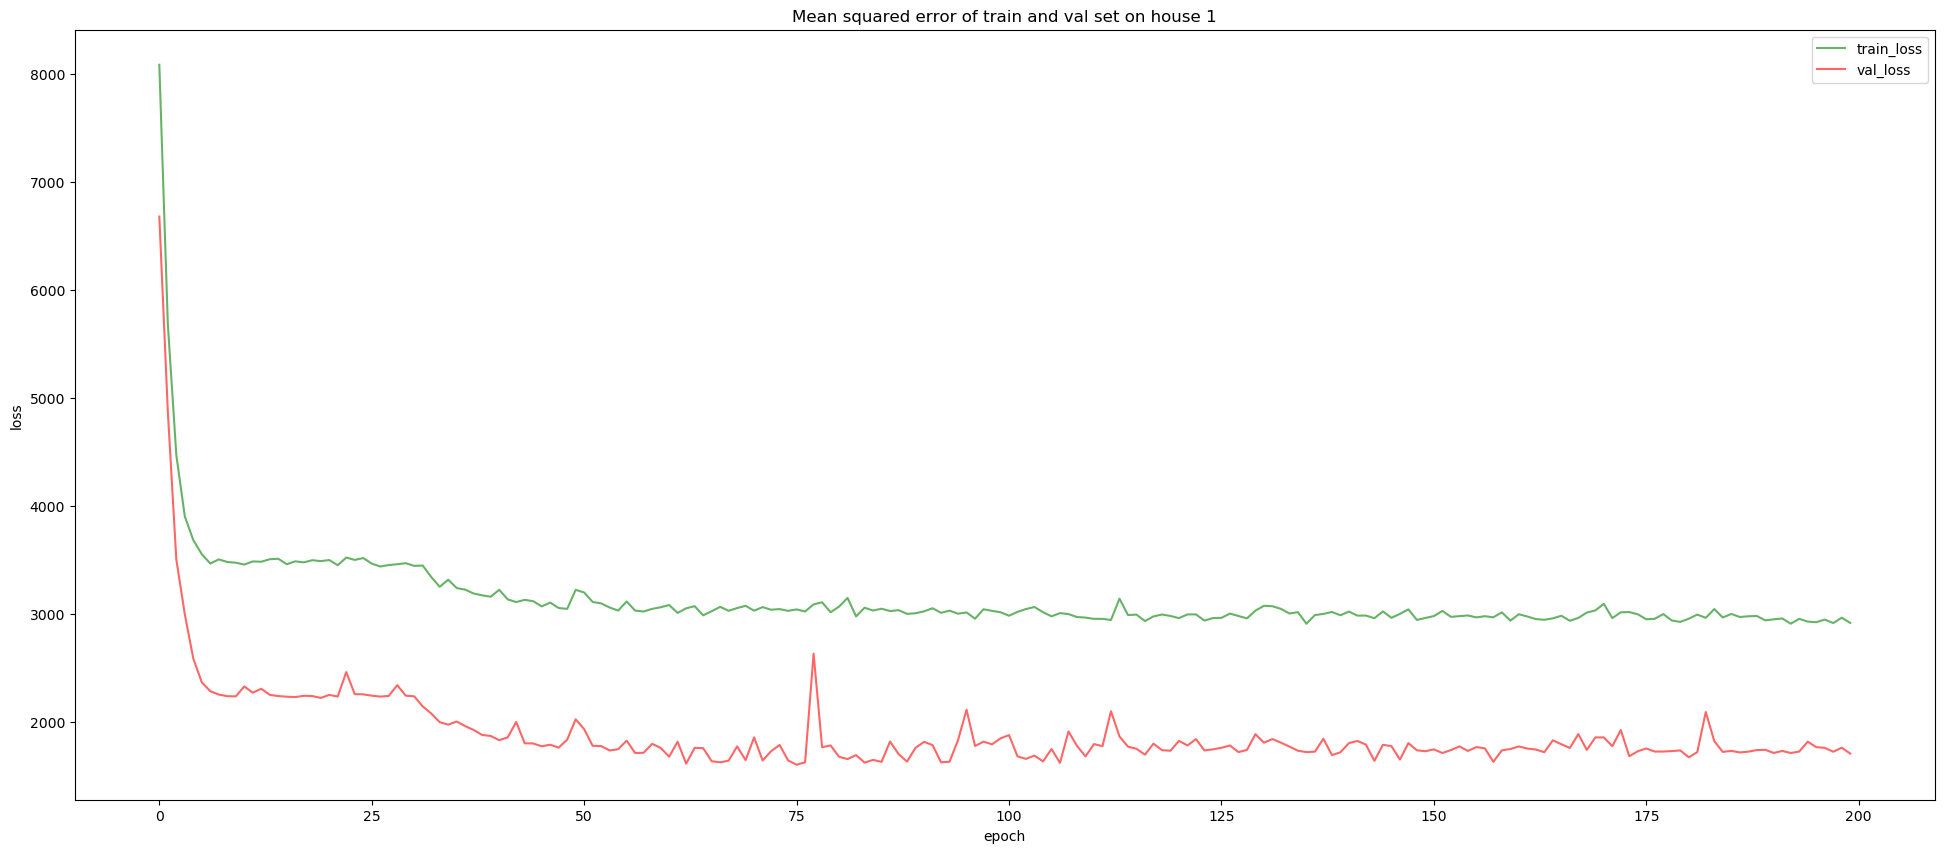

In [27]:
train_loss = hist_fc_2.history['loss']
val_loss = hist_fc_2.history['val_loss']
def plot_losses(train_loss, val_loss):
    plt.rcParams["figure.figsize"] = [24,10]
    plt.title('Mean squared error of train and val set on house 1')
    plt.plot( range(len(train_loss)), train_loss, color = 'g', alpha = 0.6, label='train_loss' )
    plt.plot( range(len( val_loss )), val_loss, color = 'r', alpha = 0.6, label='val_loss' )
    plt.xlabel( 'epoch' )
    plt.ylabel( 'loss' )
    plt.legend()

plot_losses(train_loss, val_loss)

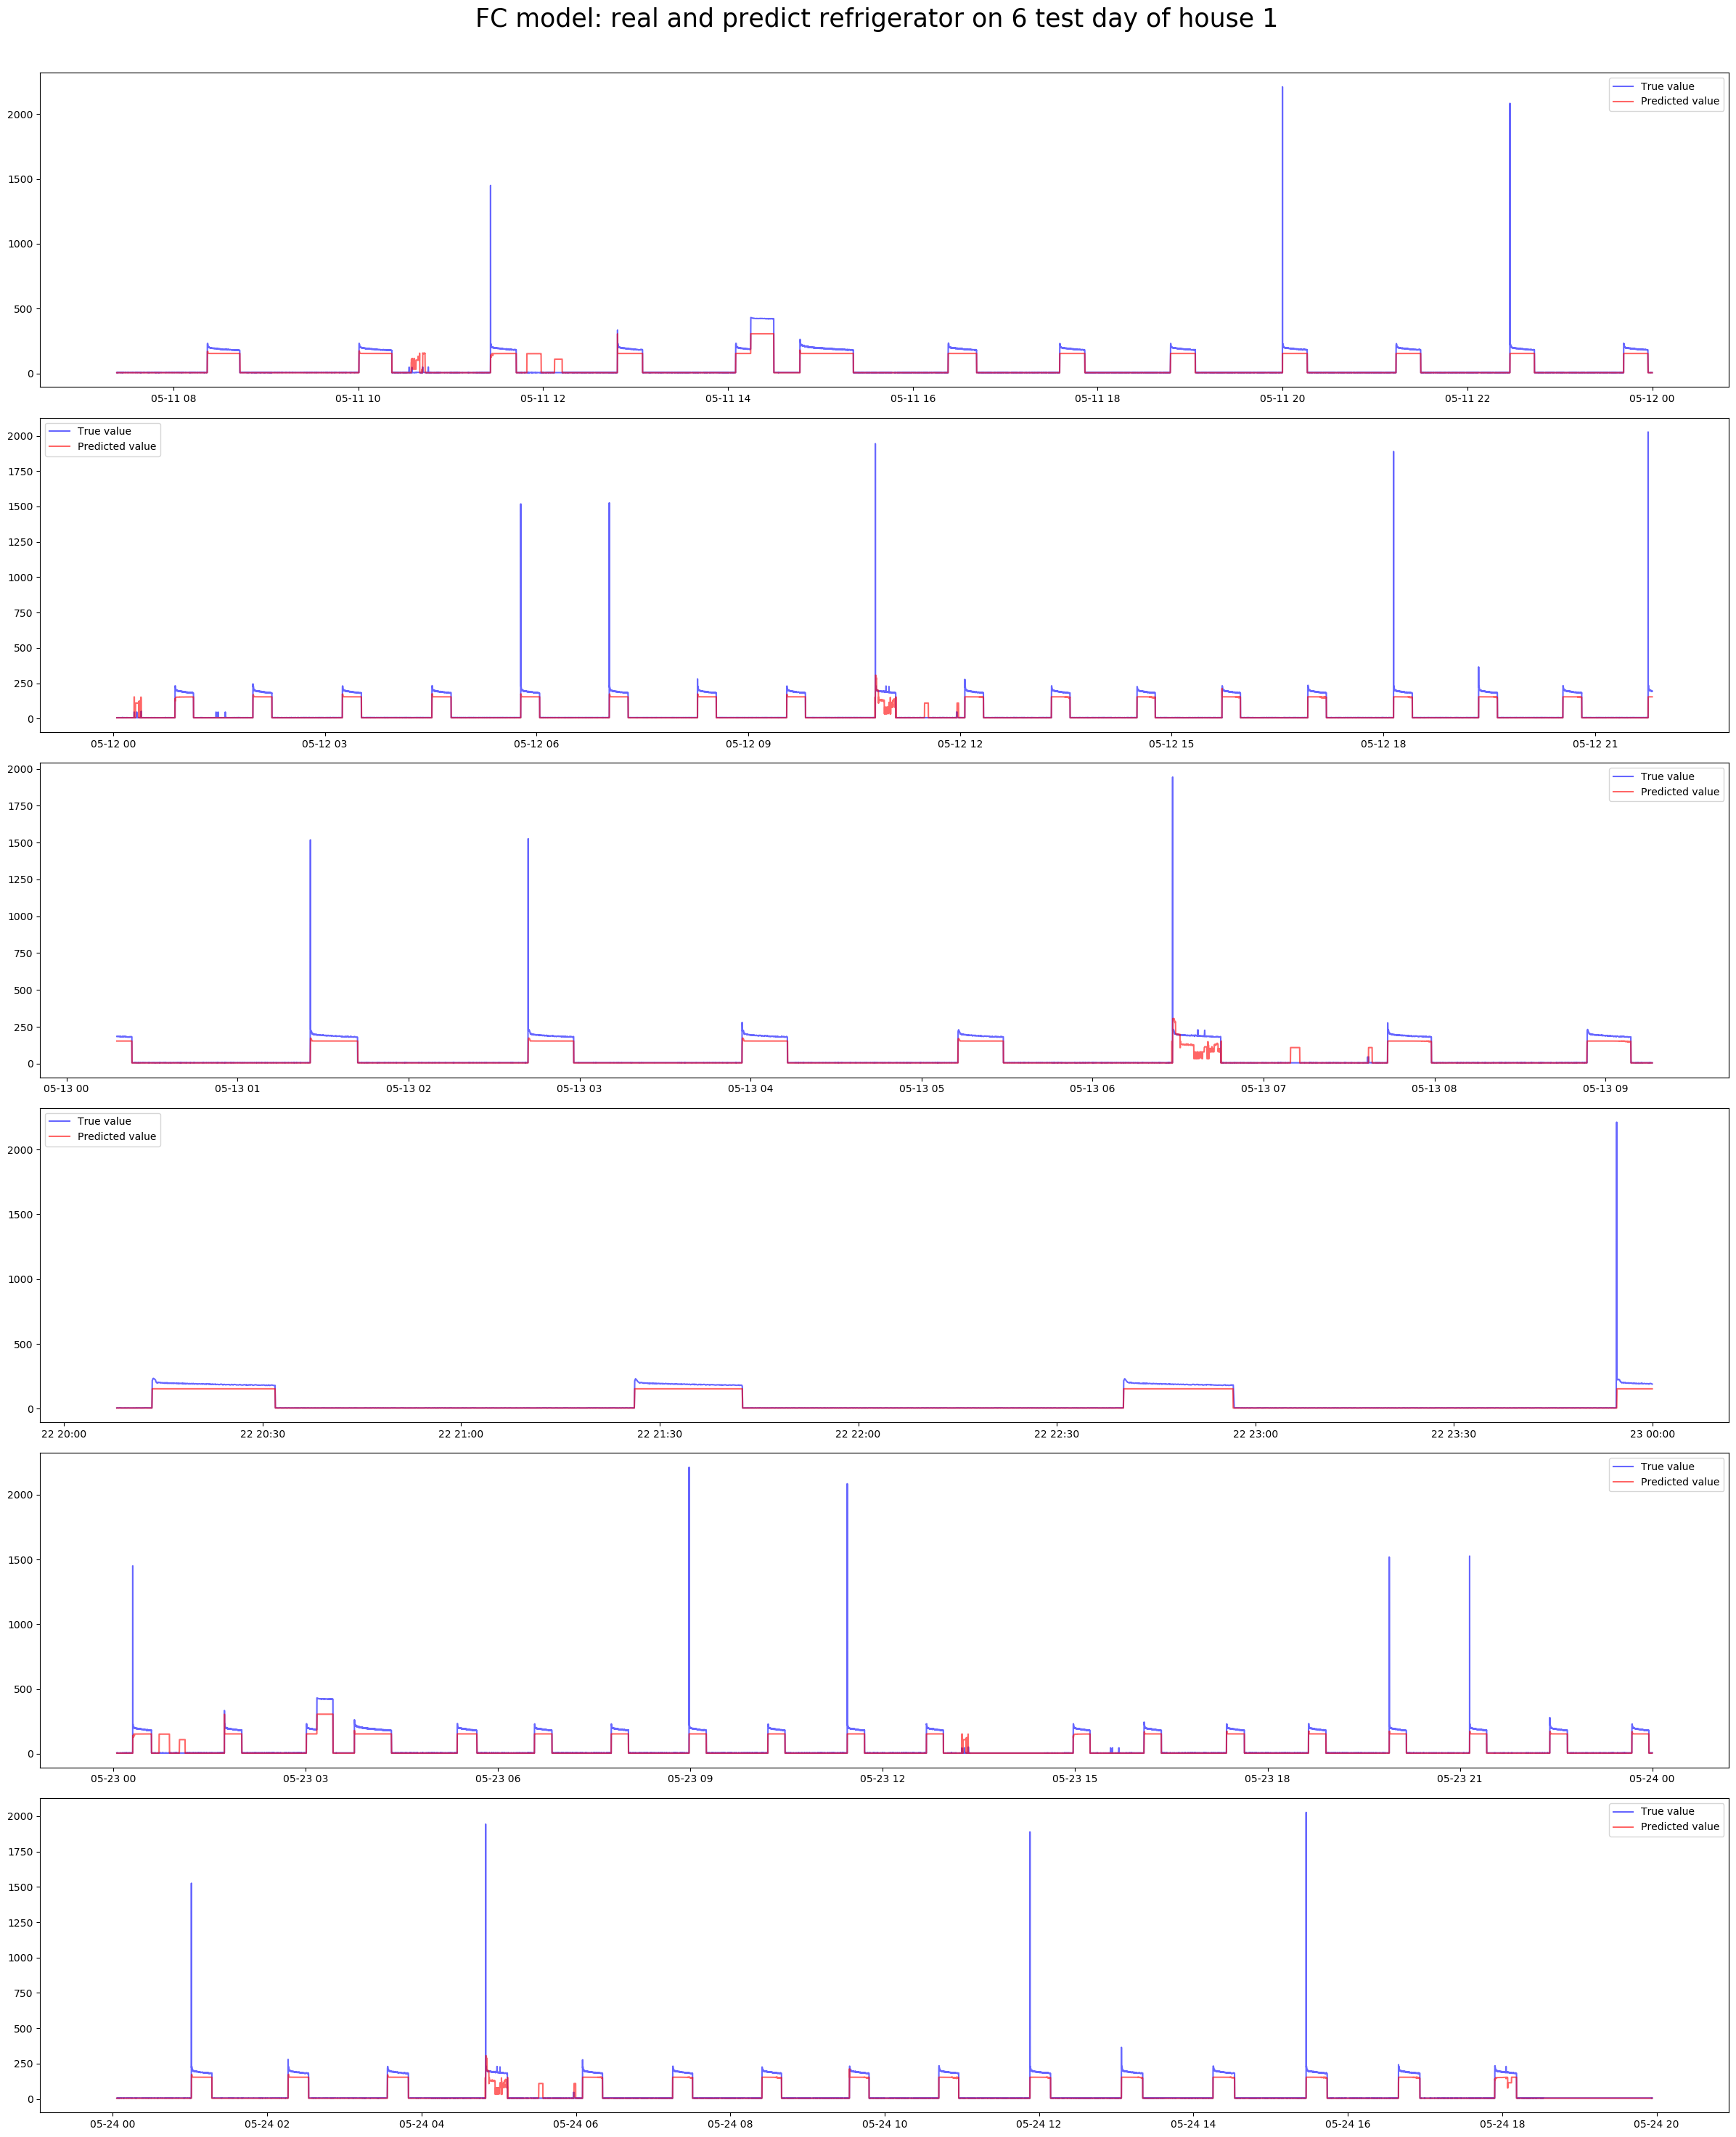

In [28]:
plot_each_app(df1_test, dates[1][17:], pred_fc_2, y_test2, 
              'FC model: real and predict refrigerator on 6 test day of house 1', look_back = 50)

***KITCHEN OUTLETS 7 TRAINING***

In [29]:
fc_model_3 = build_fc_model()
adam = Adam(lr = 1e-5)
fc_model_3.compile(loss='mean_squared_error', optimizer=adam)
start = time.time()
checkpointer = ModelCheckpoint(filepath="./fc_kitchen_outlets_7_h1_2.hdf5", verbose=0, save_best_only=True)
hist_fc_3 = fc_model_3.fit( X_train3, y_train3, batch_size=512, verbose=1, epochs=200,validation_split=0.33, callbacks=[checkpointer])

print('Finish trainning. Time: ', time.time() - start)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2, 16)             80        
                                                                 
 bidirectional_4 (Bidirectio  (None, 2, 256)           148480    
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
 dropout_2 (Dropout)         (None, 1)                

Epoch 1/200
282/282 [==============================] - 42s 119ms/step - loss: 99.8196 - val_loss: 22.7513
Epoch 2/200
282/282 [==============================] - 31s 109ms/step - loss: 93.0935 - val_loss: 22.2888
Epoch 3/200
282/282 [==============================] - 29s 105ms/step - loss: 94.7667 - val_loss: 22.5031
Epoch 4/200
282/282 [==============================] - 32s 114ms/step - loss: 94.2936 - val_loss: 22.3214
Epoch 5/200
282/282 [==============================] - 35s 123ms/step - loss: 94.7434 - val_loss: 22.5840
Epoch 6/200
282/282 [==============================] - 36s 126ms/step - loss: 94.6150 - val_loss: 22.0717
Epoch 7/200
282/282 [==============================] - 35s 126ms/step - loss: 95.1561 - val_loss: 22.2398
Epoch 8/200
282/282 [==============================] - 36s 129ms/step - loss: 94.8360 - val_loss: 22.6330
Epoch 9/200
282/282 [==============================] - 36s 126ms/step - loss: 94.7536 - val_loss: 22.3155
Epoch 10/200
282/282 [========================

In [30]:
fc_model_3 = load_model('fc_kitchen_outlets_7_h1_2.hdf5')
pred_fc_3 = fc_model_3.predict(X_test3).reshape(-1)
mse_loss_fc_3= mse_loss(pred_fc_3, y_test3)
mae_loss_fc_3 = mae_loss(pred_fc_3, y_test3)
print('Mean square error on test set: ', mse_loss_fc_3)
print('Mean absolute error on the test set: ', mae_loss_fc_3)

2721/2721 [==============================] - 33s 10ms/step
Mean square error on test set:  17.396002726384243
Mean absolute error on the test set:  3.7692927224993444


In [31]:
fc_model_3 = load_model('fc_kitchen_outlets_7_h1_2.hdf5')
pred_fc_3 = fc_model_3.predict(X_test3).reshape(-1)

2721/2721 [==============================] - 32s 11ms/step


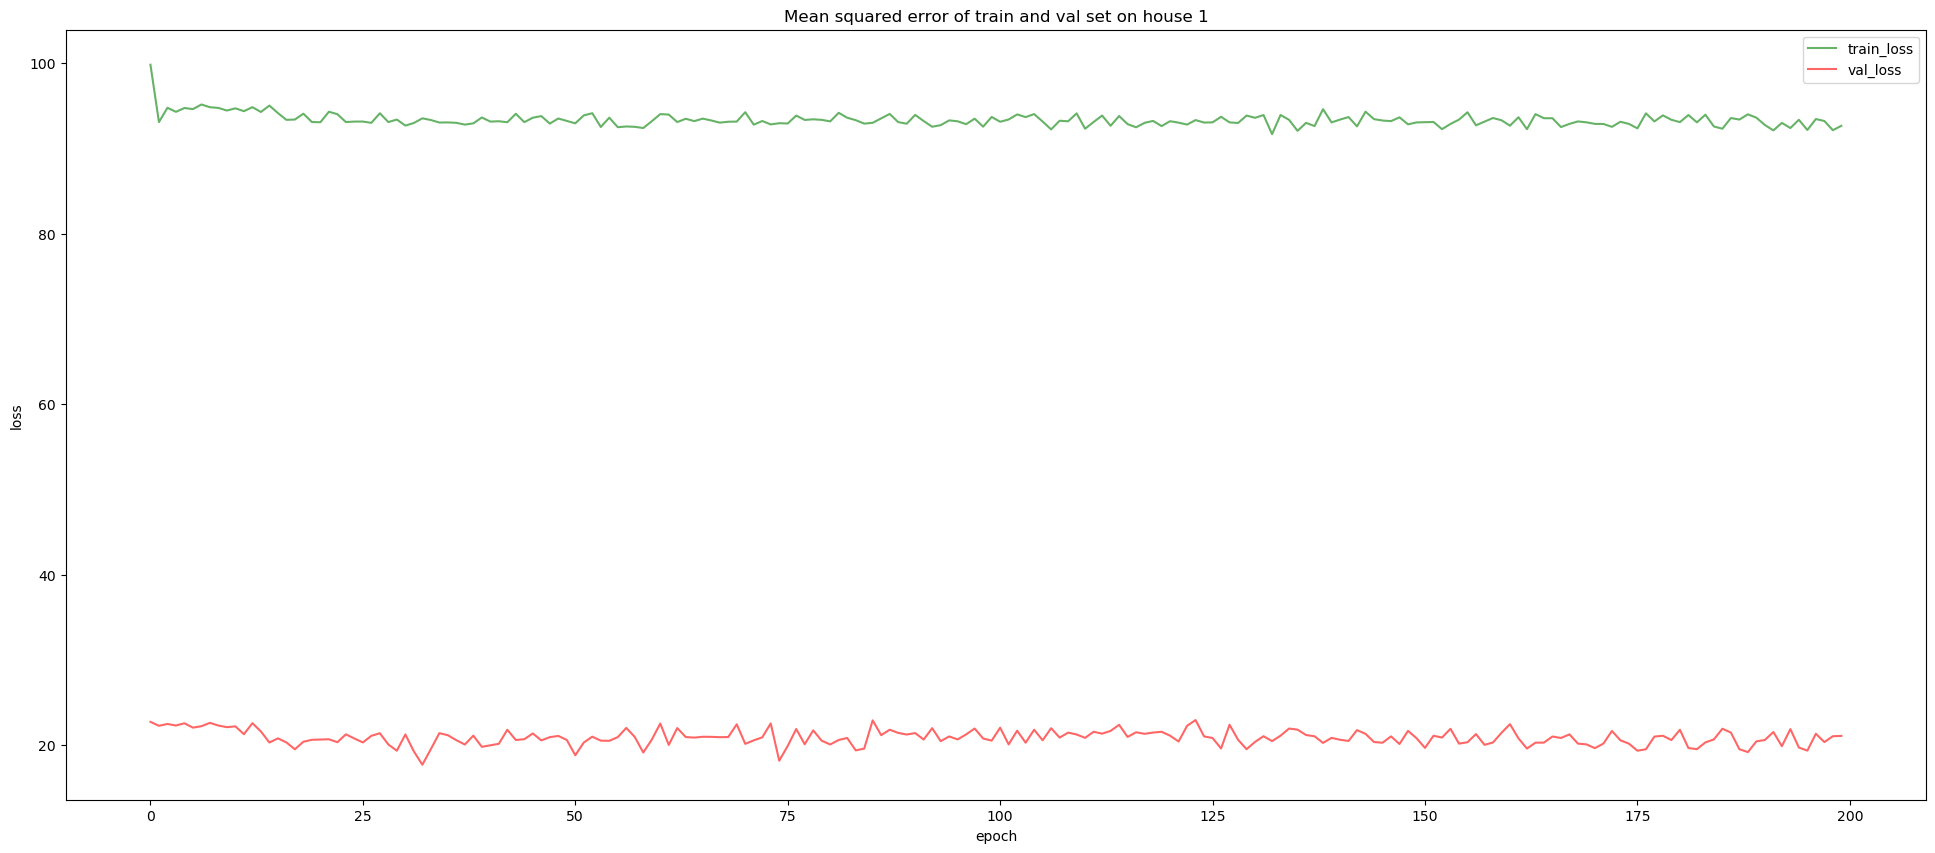

In [32]:
train_loss = hist_fc_3.history['loss']
val_loss = hist_fc_3.history['val_loss']
def plot_losses(train_loss, val_loss):
    plt.rcParams["figure.figsize"] = [24,10]
    plt.title('Mean squared error of train and val set on house 1')
    plt.plot( range(len(train_loss)), train_loss, color = 'g', alpha = 0.6, label='train_loss' )
    plt.plot( range(len( val_loss )), val_loss, color = 'r', alpha = 0.6, label='val_loss' )
    plt.xlabel( 'epoch' )
    plt.ylabel( 'loss' )
    plt.legend()

plot_losses(train_loss, val_loss)

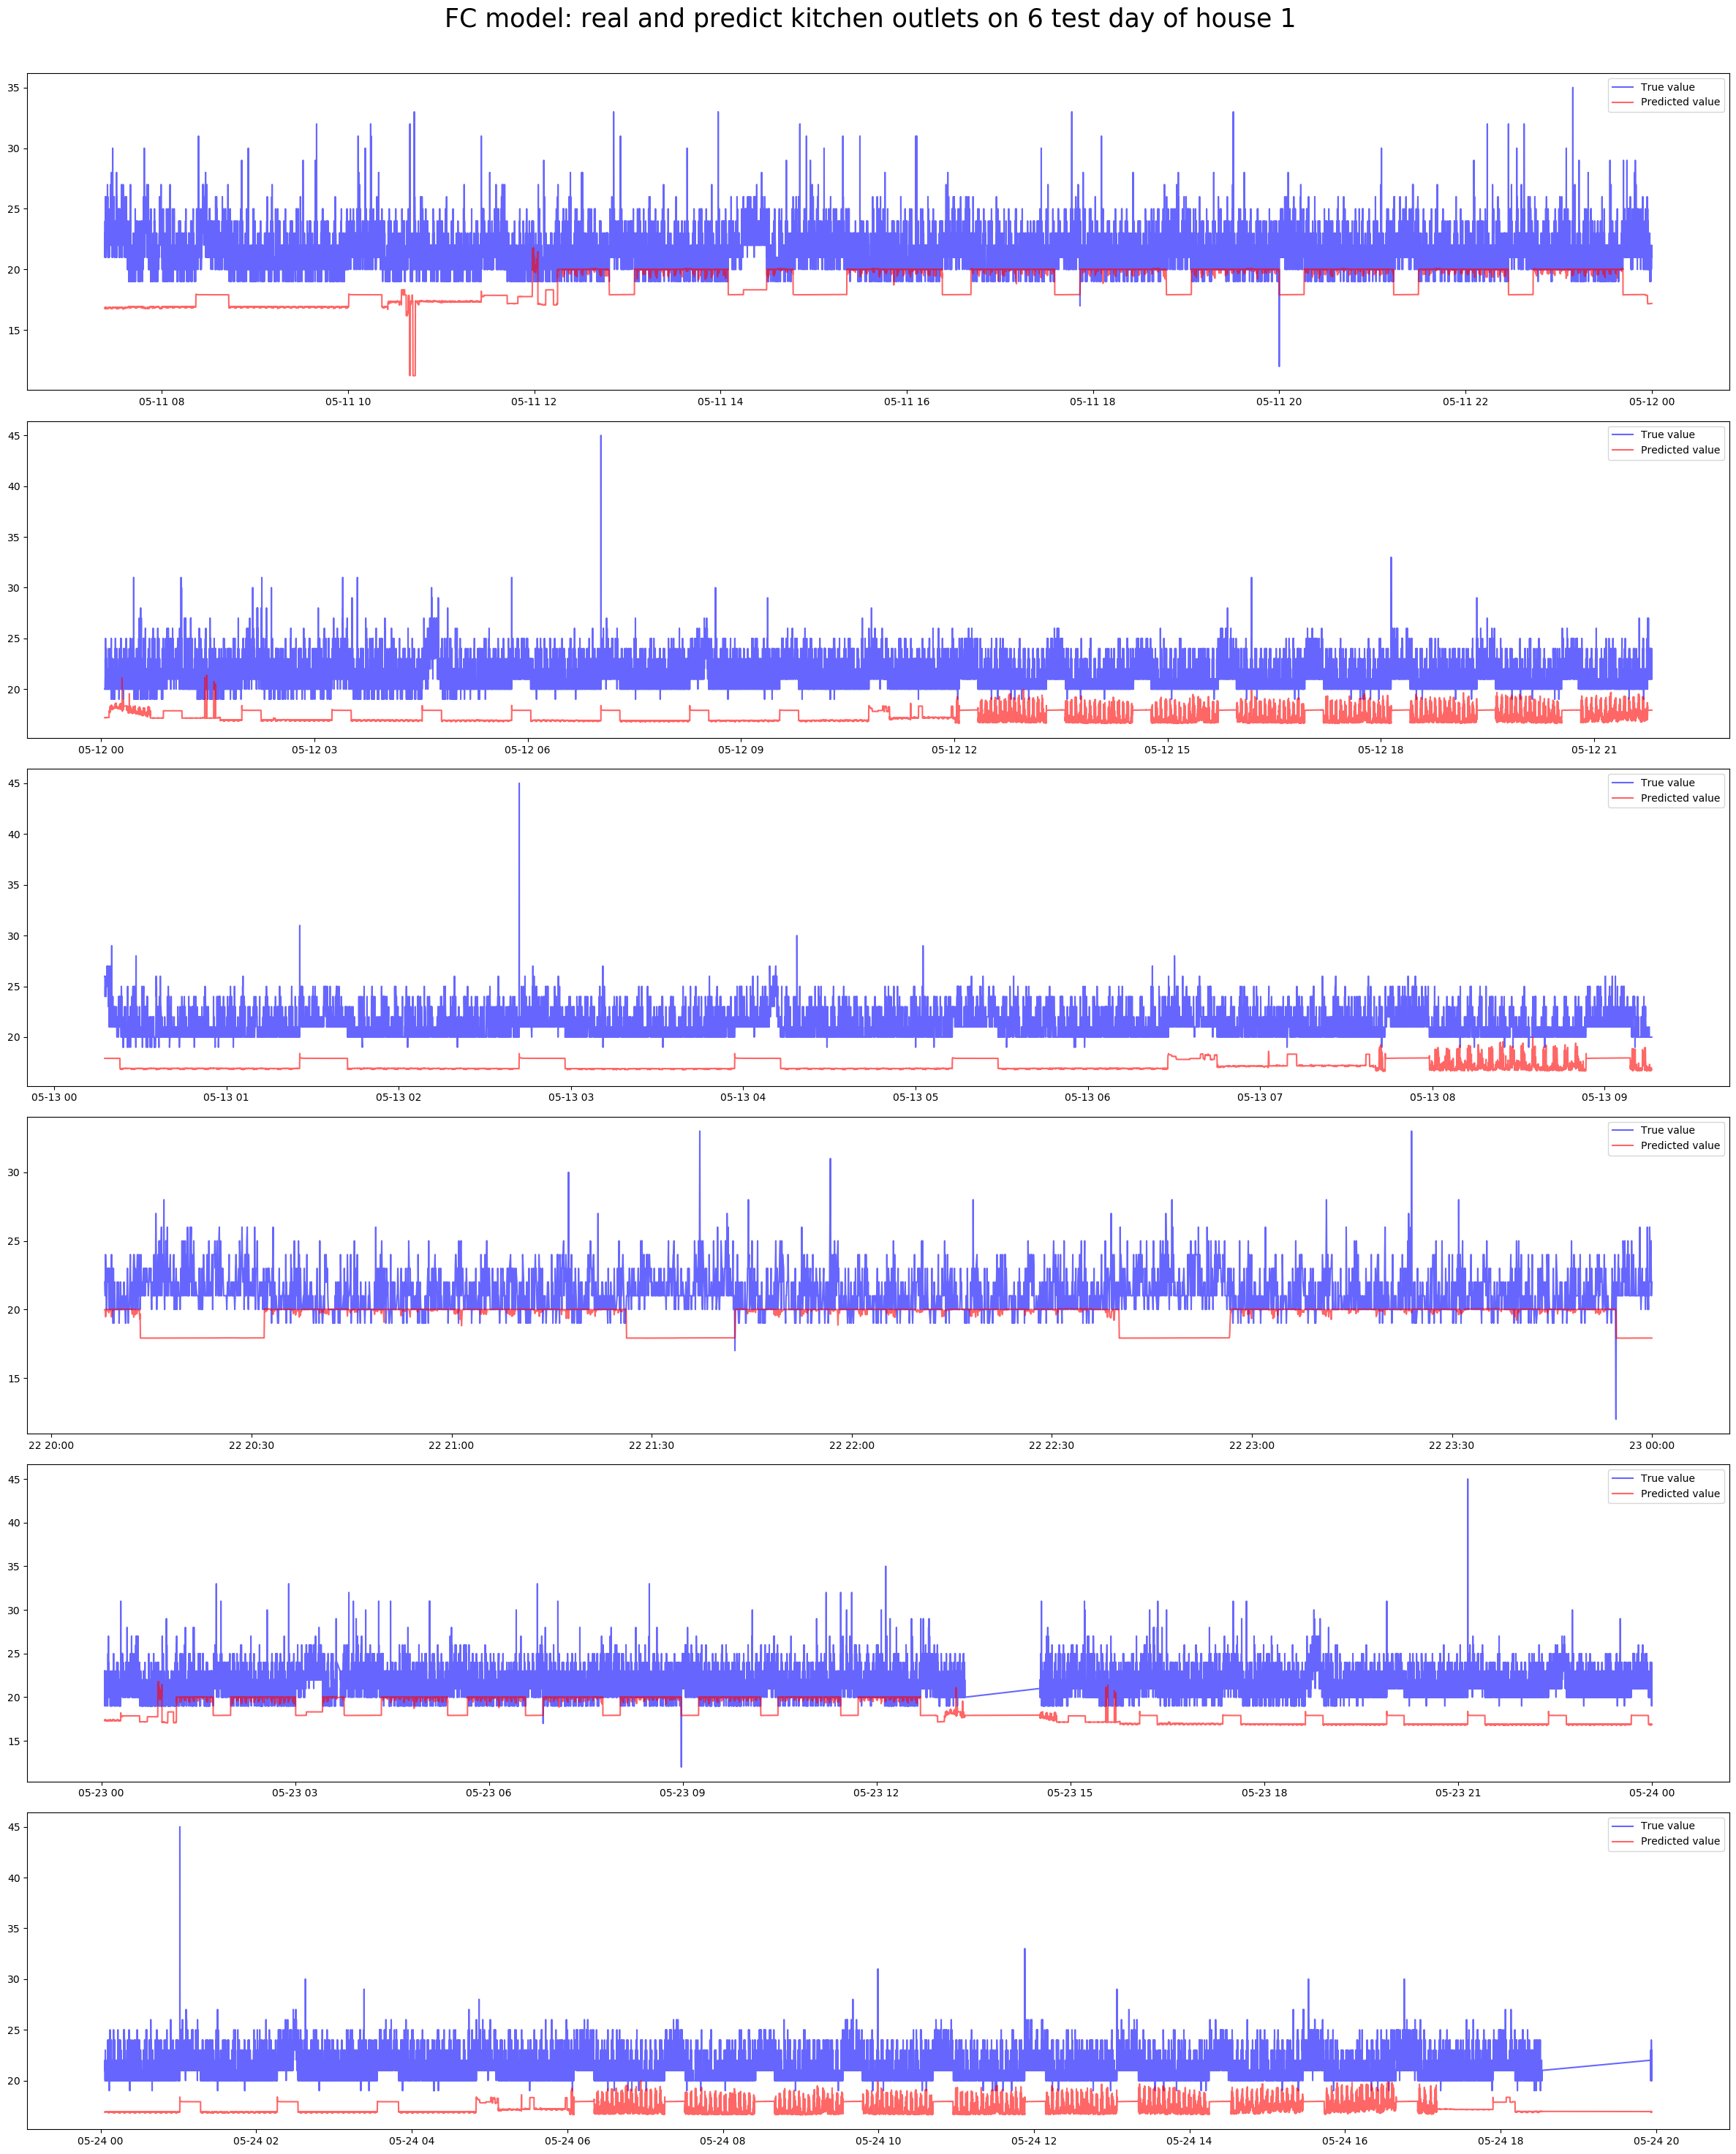

In [33]:
plot_each_app(df1_test, dates[1][17:], pred_fc_3, y_test3, 
              'FC model: real and predict kitchen outlets on 6 test day of house 1', look_back = 50)

***DISHWASHER 6 TRAINING***

In [34]:
fc_model_4 = build_fc_model()
adam = Adam(lr = 1e-5)
fc_model_4.compile(loss='mean_squared_error', optimizer=adam)
start = time.time()
checkpointer = ModelCheckpoint(filepath="./fc_dishwaser_6_h1_2.hdf5", verbose=0, save_best_only=True)
hist_fc_4 = fc_model_4.fit( X_train4, y_train4, batch_size=512, verbose=1, epochs=200,validation_split=0.33, callbacks=[checkpointer])

print('Finish trainning. Time: ', time.time() - start) 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 2, 16)             80        
                                                                 
 bidirectional_6 (Bidirectio  (None, 2, 256)           148480    
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 512)              1050624   
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
 dropout_3 (Dropout)         (None, 1)                

Epoch 1/200
282/282 [==============================] - 59s 154ms/step - loss: 19334.2246 - val_loss: 19869.9961
Epoch 2/200
282/282 [==============================] - 39s 137ms/step - loss: 18065.2109 - val_loss: 18490.1367
Epoch 3/200
282/282 [==============================] - 39s 138ms/step - loss: 16973.4297 - val_loss: 17320.3906
Epoch 4/200
282/282 [==============================] - 39s 139ms/step - loss: 15970.4326 - val_loss: 16072.9502
Epoch 5/200
282/282 [==============================] - 39s 138ms/step - loss: 15095.3184 - val_loss: 15183.5430
Epoch 6/200
282/282 [==============================] - 40s 142ms/step - loss: 14389.8281 - val_loss: 14142.1592
Epoch 7/200
282/282 [==============================] - 40s 143ms/step - loss: 13727.9082 - val_loss: 13365.2148
Epoch 8/200
282/282 [==============================] - 40s 142ms/step - loss: 13240.6680 - val_loss: 12593.7871
Epoch 9/200
282/282 [==============================] - 40s 141ms/step - loss: 12649.5811 - val_loss: 119

In [35]:
fc_model_4 = load_model('fc_dishwaser_6_h1_2.hdf5')
pred_fc_4 = fc_model_4.predict(X_test4).reshape(-1)
mse_loss_fc_4= mse_loss(pred_fc_4, y_test4)
mae_loss_fc_4 = mae_loss(pred_fc_4, y_test4)
print('Mean square error on test set: ', mse_loss_fc_4)
print('Mean absolute error on the test set: ', mae_loss_fc_4)

2721/2721 [==============================] - 21s 7ms/step
Mean square error on test set:  2180.0604795832137
Mean absolute error on the test set:  9.306642698817422


In [36]:
fc_model_4 = load_model('fc_dishwaser_6_h1_2.hdf5')
pred_fc_4 = fc_model_4.predict(X_test4).reshape(-1)

2721/2721 [==============================] - 19s 6ms/step


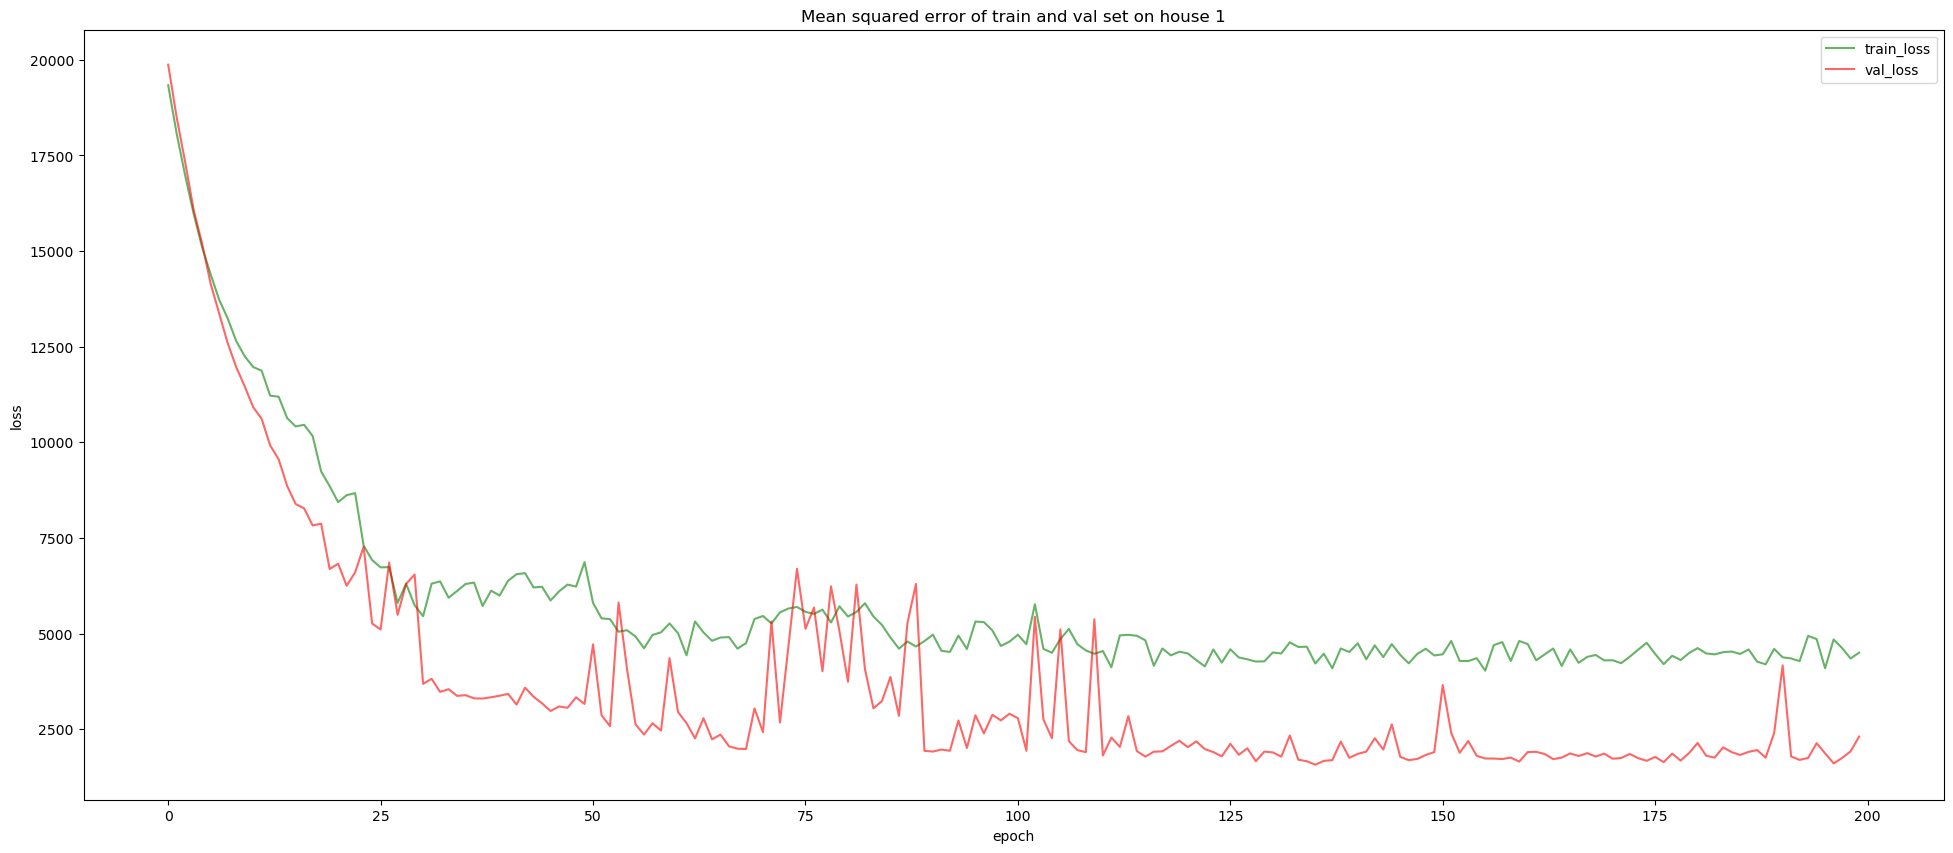

In [37]:
train_loss = hist_fc_4.history['loss']
val_loss = hist_fc_4.history['val_loss']
def plot_losses(train_loss, val_loss):
    plt.rcParams["figure.figsize"] = [24,10]
    plt.title('Mean squared error of train and val set on house 1')
    plt.plot( range(len(train_loss)), train_loss, color = 'g', alpha = 0.6, label='train_loss' )
    plt.plot( range(len( val_loss )), val_loss, color = 'r', alpha = 0.6, label='val_loss' )
    plt.xlabel( 'epoch' )
    plt.ylabel( 'loss' )
    plt.legend()

plot_losses(train_loss, val_loss)

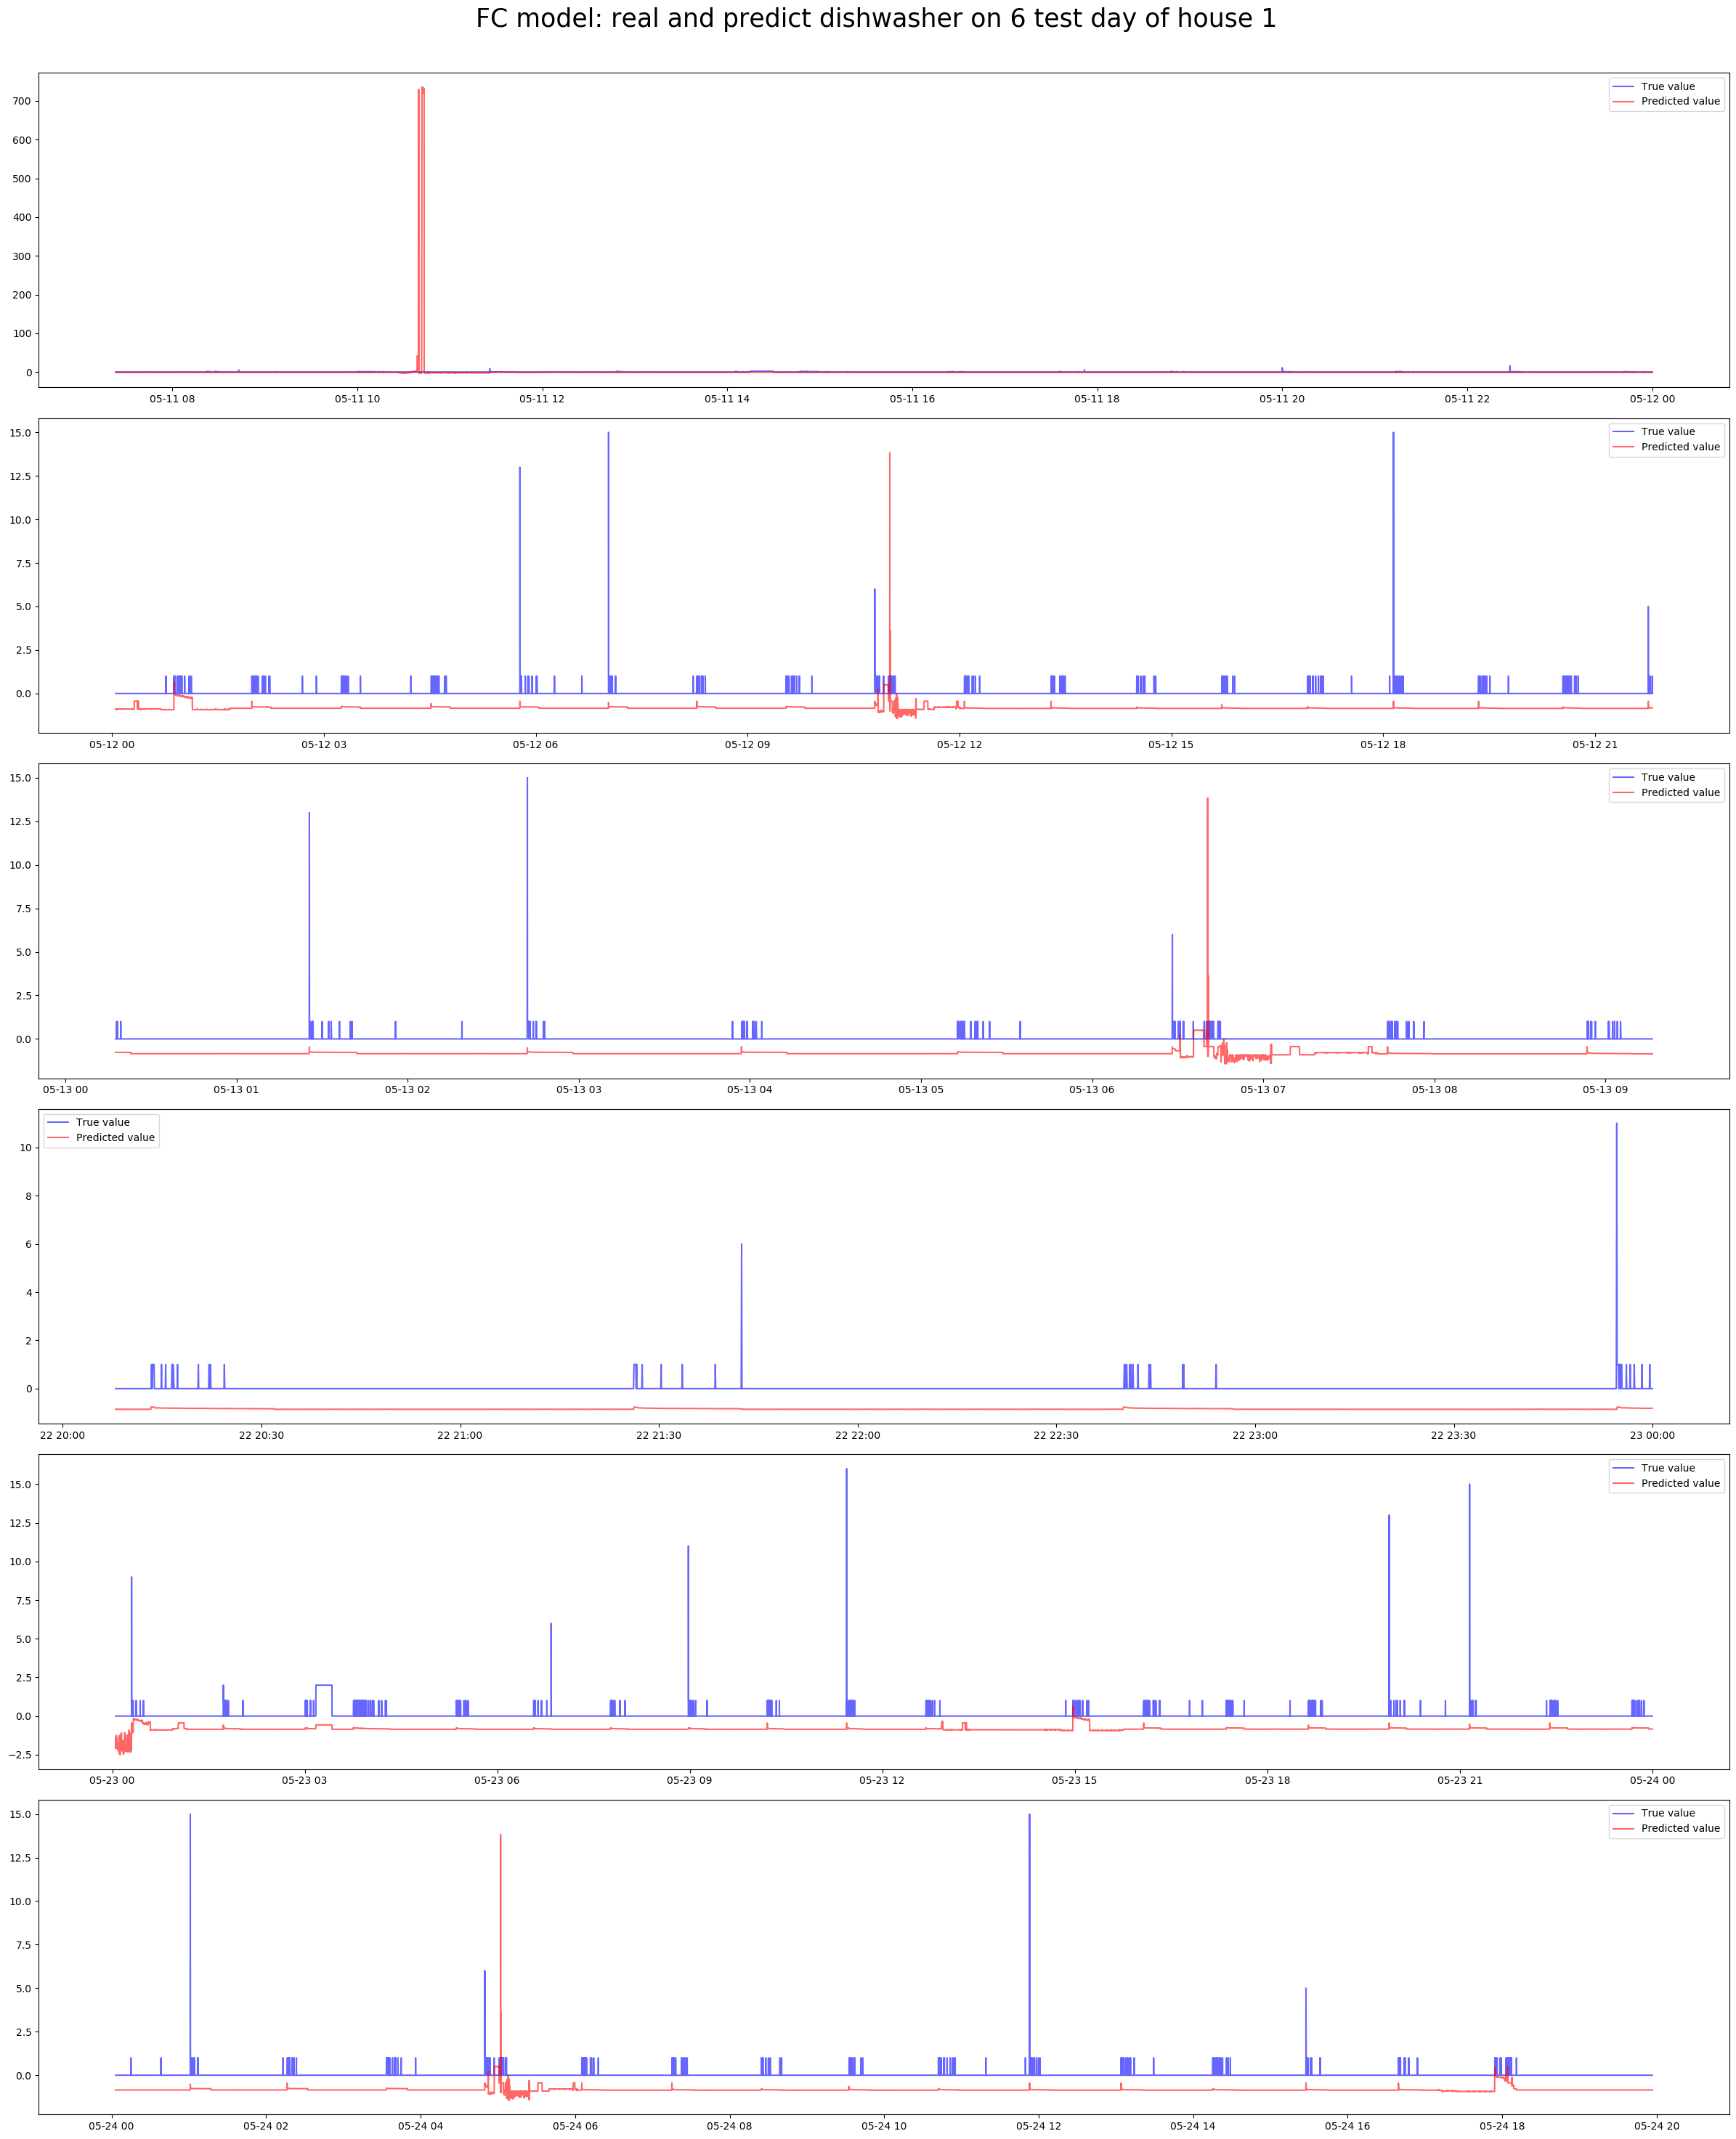

In [38]:
plot_each_app(df1_test, dates[1][17:], pred_fc_4, y_test4, 
              'FC model: real and predict dishwasher on 6 test day of house 1', look_back = 50)